# **MLP for Regression and Classification**

# CS550 Assignment 3

## Name: Sudhir Sharma
## ID: 12041500

In [ ]:
# !pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle competitions download -c new-york-city-taxi-fare-prediction

In [ ]:
# !unzip new-york-city-taxi-fare-prediction

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import math
from math import sqrt

from numpy import absolute
from numpy import mean
from numpy import std

from sklearn import metrics
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn import neighbors

!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError 
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
!pip install haversine 
from tensorflow.random import set_seed
!pip install xgboost
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Part 1: Predicting Taxi Fares

# Implement MLP model using Keras <a class="anchor" id="6"></a>

- The implementation of MLP model in Keras comprises of three steps:-

  - Compiling the model with the compile() method.
  
  - Training the model with fit() method.
  
  - Evaluating the model performance with evaluate() method.
  


## Reference https://www.kaggle.com/code/afrinp/nyc-taxi-fare-prediction-5-lakh-rows#Making-ML-Model

In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, TimeDistributed, Flatten, MaxPooling1D,Conv1D,Dropout
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet,HuberRegressor,PassiveAggressiveRegressor,SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from math import radians, cos, sin, asin, sqrt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings("ignore")
%matplotlib inline

#### There is a lot of data, which will require a lot of computing resources, so I took only a part of itloading data

In [ ]:
# loading train data
my_dataframe = pd.read_csv('train.csv',nrows = 1000000)
# loading test data
testdf = pd.read_csv('test.csv')

will only be including 1,000,000 rows in this notebook due to size constraints

In [ ]:
print(f'Number of records: {my_dataframe.shape[0]}')
print(f'Number of columns: {my_dataframe.shape[1]}')

Number of records: 1000000
Number of columns: 8


In [ ]:
my_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


Info about our data

In [ ]:
my_dataframe.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000,1000000.000,1000000.000,999990.000,999990.000,1000000.000
mean,11.348,-72.527,39.929,-72.528,39.920,1.685
std,9.822,12.058,7.626,11.324,8.201,1.324
min,-44.900,-3377.681,-3116.285,-3383.297,-3114.339,0.000
25%,6.000,-73.992,40.735,-73.991,40.734,1.000
50%,8.500,-73.982,40.753,-73.980,40.753,1.000
75%,12.500,-73.967,40.767,-73.964,40.768,2.000
max,500.000,2522.271,2621.628,45.582,1651.553,208.000


In [ ]:
my_dataframe.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.500,2009-06-15 17:26:21 UTC,-73.844,40.721,-73.842,40.712,1
1,2010-01-05 16:52:16.0000002,16.900,2010-01-05 16:52:16 UTC,-74.016,40.711,-73.979,40.782,1
2,2011-08-18 00:35:00.00000049,5.700,2011-08-18 00:35:00 UTC,-73.983,40.761,-73.991,40.751,2
3,2012-04-21 04:30:42.0000001,7.700,2012-04-21 04:30:42 UTC,-73.987,40.733,-73.992,40.758,1
4,2010-03-09 07:51:00.000000135,5.300,2010-03-09 07:51:00 UTC,-73.968,40.768,-73.957,40.784,1


Statistical summary of data

In [ ]:
my_dataframe[my_dataframe.isnull().any(1)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.500,2012-12-11 12:57:00 UTC,-73.993,40.743,NaN,NaN,0
245696,2013-03-21 18:07:07.0000001,86.500,2013-03-21 18:07:07 UTC,-73.992,40.741,NaN,NaN,0
340533,2012-12-11 12:50:52.00000010,27.500,2012-12-11 12:50:52 UTC,-73.980,40.785,NaN,NaN,0
428108,2011-09-08 09:12:52.0000001,11.800,2011-09-08 09:12:52 UTC,-73.987,40.752,NaN,NaN,0
471472,2012-12-11 12:34:20.0000006,7.800,2012-12-11 12:34:20 UTC,0.000,0.000,NaN,NaN,0
524834,2011-09-25 23:01:12.0000005,14.760,2011-09-25 23:01:12 UTC,-73.985,40.769,NaN,NaN,0
574023,2013-11-04 20:59:15.0000001,10.200,2013-11-04 20:59:15 UTC,-73.998,40.745,NaN,NaN,0
580338,2012-12-11 12:00:53.0000002,21.000,2012-12-11 12:00:53 UTC,-73.975,40.752,NaN,NaN,0
794694,2013-11-04 20:07:59.0000006,7.200,2013-11-04 20:07:59 UTC,-73.977,40.788,NaN,NaN,0
895400,2011-06-20 11:34:44.0000001,40.000,2011-06-20 11:34:44 UTC,-73.863,40.769,NaN,NaN,0


## From this we learn that
* The minimum fare is negative, which is impossible
* Some travel points are missing the city
* The maximum number of passengers is equal to 208, which is impossible
* The maximum fare also unreal

##  A Data Cleaning & Feature Engineering

Rows with missing values

In [ ]:
my_dataframe.columns[my_dataframe.isnull().any()]

Index(['dropoff_longitude', 'dropoff_latitude'], dtype='object')

columns with null values

In [ ]:
my_dataframe1 = my_dataframe[~my_dataframe.isnull().any(1)]

Dropping null values rows


**longitude and latitude**

found NaN values in columns dropoff_longitude and dropoff_latitude     
We found NaN values in columns

i) dropoff_longitude and 

ii) dropoff_latitude  

which is not much as comapared to our trainset. So we will Drop it.


In [ ]:
# swap these values
wrong_location = my_dataframe1[((my_dataframe1['dropoff_latitude'] < 0) | (my_dataframe1['pickup_latitude'] < 0)) & ((my_dataframe1['dropoff_longitude'] > 0) | (my_dataframe1['pickup_longitude'] > 0))]

In [ ]:
# swap columns
wrong_location.columns = ['key','fare_amount',"pickup_datetime","pickup_latitude","pickup_longitude",
                              "dropoff_latitude","dropoff_longitude","passenger_count"]

In [ ]:
# merge these values back into original my_dataframe
my_dataframe1.loc[my_dataframe1.index.isin(wrong_location.index),["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude"]] = wrong_location[["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude"]]

In [ ]:
# remaining odd coordinates, drop them
my_dataframe1[((my_dataframe1['dropoff_latitude'] < 0) | (my_dataframe1['pickup_latitude'] < 0)) & ((my_dataframe1['dropoff_longitude'] > 0) | (my_dataframe1['pickup_longitude'] > 0))]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
66433,2010-07-28 09:22:00.000000254,7.300,2010-07-28 09:22:00 UTC,-0.004,0.003,0.006,-0.004,5
98000,2011-10-16 19:39:00.00000069,5.700,2011-10-16 19:39:00 UTC,0.003,-0.001,-0.001,0.002,2
174356,2011-11-21 21:36:00.00000081,9.700,2011-11-21 21:36:00 UTC,1703.093,2140.601,-1189.615,-1251.196,1
444028,2010-11-28 12:16:00.000000129,5.700,2010-11-28 12:16:00 UTC,-0.002,0.002,0.002,-0.002,1
549740,2011-04-21 15:58:00.00000020,5.700,2011-04-21 15:58:00 UTC,0.000,-0.002,-0.000,0.002,5
688685,2012-03-22 21:40:00.000000188,17.300,2012-03-22 21:40:00 UTC,2621.628,2522.271,-2864.471,-1718.118,1
717954,2009-07-19 09:54:00.00000020,5.300,2009-07-19 09:54:00 UTC,0.004,0.003,-0.000,-0.001,1
793922,2012-06-03 11:19:37.0000002,32.100,2012-06-03 11:19:37 UTC,40.769,-73.863,-2.013,45.582,2


In [ ]:
# drop the remaining 77 rows
drop = my_dataframe1[((my_dataframe1['dropoff_latitude'] < 0) | (my_dataframe1['pickup_latitude'] < 0)) & ((my_dataframe1['dropoff_longitude'] > 0) | (my_dataframe1['pickup_longitude'] > 0))]
my_dataframe1 = my_dataframe1[~my_dataframe1.index.isin(drop.index)]

Longitudes should be negative and latitudes should be positive 


In [ ]:
my_dataframe1 = my_dataframe1.drop(my_dataframe1[(my_dataframe1['dropoff_latitude'] == 0) & (my_dataframe1['dropoff_longitude'] == 0) & (my_dataframe1['pickup_latitude'] == 0) & (my_dataframe1['pickup_longitude'] ==0)].index)

Since range of longitudes and latitudes for cities in USA is between -125 & -67 and 24 & 50 respectively, remove all the other records that fall outside of these ranges

dropping these records that sit in the ATLANTIC OCEAN:

In [ ]:
my_dataframe1.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.500,2009-06-15 17:26:21 UTC,-73.844,40.721,-73.842,40.712,1
1,2010-01-05 16:52:16.0000002,16.900,2010-01-05 16:52:16 UTC,-74.016,40.711,-73.979,40.782,1
2,2011-08-18 00:35:00.00000049,5.700,2011-08-18 00:35:00 UTC,-73.983,40.761,-73.991,40.751,2
3,2012-04-21 04:30:42.0000001,7.700,2012-04-21 04:30:42 UTC,-73.987,40.733,-73.992,40.758,1
4,2010-03-09 07:51:00.000000135,5.300,2010-03-09 07:51:00 UTC,-73.968,40.768,-73.957,40.784,1


In [ ]:
my_dataframe1[((my_dataframe1["pickup_latitude"] < 24) & (my_dataframe1["pickup_latitude"] > 50)) | (my_dataframe1["dropoff_latitude"]) < 24 & (my_dataframe1["dropoff_latitude"] > 50)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [ ]:
my_dataframe1.loc[((my_dataframe1["pickup_longitude"] < -125) & (my_dataframe1["pickup_longitude"]  > -67)) | (my_dataframe1["dropoff_longitude"])  < -125 & (my_dataframe1["dropoff_longitude"] > -67)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1260,2011-03-10 20:25:00.00000049,5.700,2011-03-10 20:25:00 UTC,-73.974,40.755,0.000,0.000,2
2280,2011-08-29 08:24:00.000000107,8.900,2011-08-29 08:24:00 UTC,-73.937,40.758,0.000,40.758,1
4278,2015-04-07 23:33:02.0000005,7.000,2015-04-07 23:33:02 UTC,-73.973,40.757,0.000,0.000,1
8647,2014-03-27 18:01:00.00000071,21.500,2014-03-27 18:01:00 UTC,-74.002,40.751,0.000,0.000,1
10458,2013-02-23 20:58:00.000000150,2.500,2013-02-23 20:58:00 UTC,-73.980,40.766,0.000,0.000,1
...,...,...,...,...,...,...,...,...
993372,2014-03-26 08:08:00.000000105,9.500,2014-03-26 08:08:00 UTC,-73.952,40.777,0.000,0.000,1
993672,2014-04-22 12:47:34.0000003,5.500,2014-04-22 12:47:34 UTC,-73.992,40.667,0.000,0.000,1
994162,2014-03-29 14:49:00.000000146,11.000,2014-03-29 14:49:00 UTC,-73.968,40.751,0.000,0.000,1
994608,2014-07-08 23:07:00.000000219,31.330,2014-07-08 23:07:00 UTC,-73.915,40.707,0.000,0.000,6


dropping odd latitudes and odd longitudes

In [ ]:
drop = my_dataframe1.loc[((my_dataframe1["pickup_longitude"] < -125) & (my_dataframe1["pickup_longitude"]  > -67)) | (my_dataframe1["dropoff_longitude"])  < -125 & (my_dataframe1["dropoff_longitude"] > -67)]
my_dataframe1 = my_dataframe1[~my_dataframe1.index.isin(drop.index)]

Drop records that fall outside of testdf's coordinates

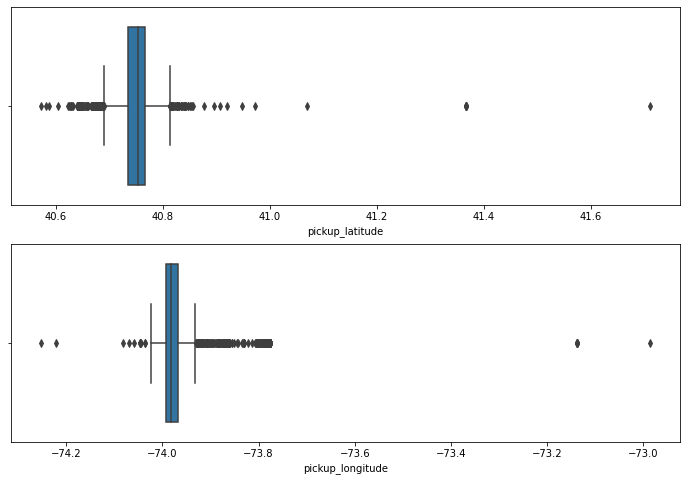

In [ ]:
fig,ax= plt.subplots(2,figsize = (12,8))
sns.boxplot(testdf['pickup_latitude'],ax = ax[0])
sns.boxplot(testdf['pickup_longitude'],ax = ax[1])

looking at range of pickup latitude and longitude in test set

In [ ]:
testdf.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000,9914.000,9914.000,9914.000,9914.000
mean,-73.975,40.751,-73.974,40.752,1.671
std,0.043,0.034,0.039,0.035,1.279
min,-74.252,40.573,-74.263,40.569,1.000
25%,-73.993,40.736,-73.991,40.735,1.000
50%,-73.982,40.753,-73.980,40.754,1.000
75%,-73.968,40.767,-73.964,40.769,2.000
max,-72.987,41.710,-72.991,41.697,6.000


In [ ]:
my_dataframe1 = my_dataframe1[((my_dataframe1['pickup_longitude'] > -75) & (my_dataframe1['pickup_longitude'] < -72)) & ((my_dataframe1['pickup_latitude'] > 40) & (my_dataframe1['pickup_latitude'] < 42)) & ((my_dataframe1['dropoff_longitude'] > -75) & (my_dataframe1['dropoff_longitude'] < -72)) & ((my_dataframe1['dropoff_latitude'] > 40) & (my_dataframe1['dropoff_latitude'] < 42))]

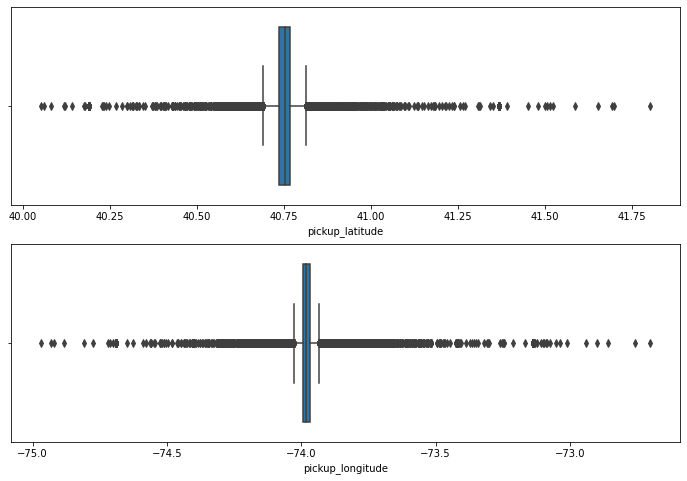

In [ ]:
fig,ax= plt.subplots(2,figsize = (12,8))
sns.boxplot(my_dataframe1['pickup_latitude'],ax = ax[0])
sns.boxplot(my_dataframe1['pickup_longitude'],ax = ax[1])

 looking at range of pickup latitude and longitude in test se

In [ ]:
my_dataframe1 = my_dataframe1.drop(my_dataframe1[my_dataframe1['fare_amount'] <= 0].index)

Dropping unrealistic and negative cab fares

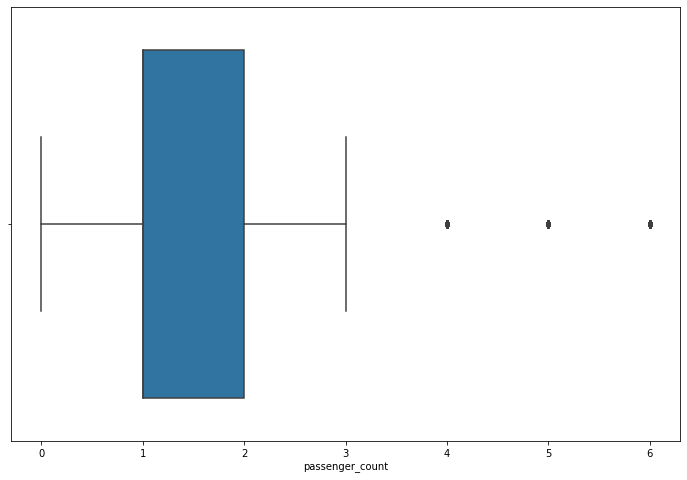

In [ ]:
fig,ax= plt.subplots(figsize = (12,8))
sns.boxplot(my_dataframe1['passenger_count'])

In [ ]:
my_dataframe1[my_dataframe1['passenger_count'] >50]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Dropping unrealistic passenger count

In [ ]:
my_dataframe1 = my_dataframe1.drop(my_dataframe1[my_dataframe1['passenger_count'] > 50].index)

dropping the 2 extreme values

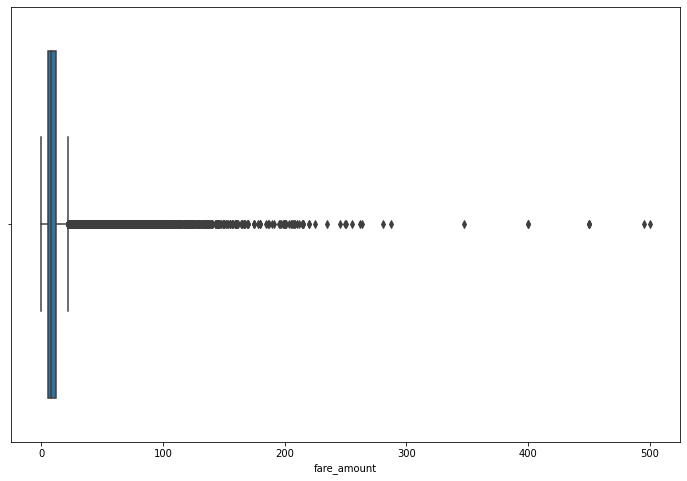

In [ ]:
fig,ax= plt.subplots(figsize = (12,8))
sns.boxplot(my_dataframe1['fare_amount'])

#### There will be no negative tax and you may not be able to pay more than a certain limit depending on the circumstances, let's say this limit is 200\\$ 
Also, I came to know from google that the minimum fare for a New York taxi is 2,50\\$  

In [ ]:
# Assumption: cab fares are all below $200
my_dataframe1 = my_dataframe1.drop(my_dataframe1[my_dataframe1['fare_amount'] > 200].index)

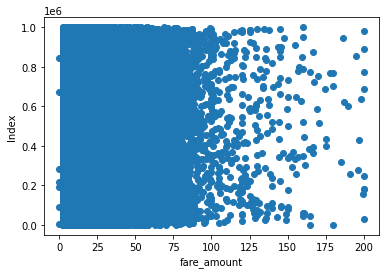

In [ ]:
plt.scatter(x=my_dataframe1.fare_amount,y=my_dataframe1.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

In [ ]:
print("Number of Fare_amount <=0 is")
my_dataframe1['fare_amount'][(my_dataframe1.fare_amount<=0)].count()

Number of Fare_amount <=0 is


0

## Final checking if still some outliers are left

In [ ]:
print('Number of observations out of valid range in coordinate columns:', end="\n")

print('pickup_longitude', end=': ')
print((my_dataframe1.pickup_longitude <-180).sum()+(my_dataframe1.pickup_longitude > 180).sum())

print('pickup_latitude', end=': ')
print((my_dataframe1.pickup_latitude <-90).sum()+(my_dataframe1.pickup_latitude > 90).sum())

print('dropoff_longitude', end=': ')
print((my_dataframe1.dropoff_longitude <-180).sum()+(my_dataframe1.dropoff_longitude > 180).sum())

print('dropoff_latitude', end=': ')
print((my_dataframe1.dropoff_latitude <-90).sum()+(my_dataframe1.dropoff_latitude > 90).sum())

if(((my_dataframe1.pickup_longitude <-180).sum()+(my_dataframe1.pickup_longitude > 180).sum() and (my_dataframe1.pickup_latitude <-90).sum()+(my_dataframe1.pickup_latitude > 90).sum() and (my_dataframe1.dropoff_longitude <-180).sum()+(my_dataframe1.dropoff_longitude > 180).sum() and (my_dataframe1.dropoff_latitude <-90).sum()+(my_dataframe1.dropoff_latitude > 90).sum())==0):
    print("No OutLiers Left")
else:
    print("Outliers Still Left")  

Number of observations out of valid range in coordinate columns:
pickup_longitude: 0
pickup_latitude: 0
dropoff_longitude: 0
dropoff_latitude: 0
No OutLiers Left


Dropping unrealitstic fare amount

## Feature Engineering

Changing datatypes and creating new fields

In [ ]:
pd.to_datetime(pd.to_datetime(my_dataframe1.head()['pickup_datetime']).dt.strftime("%Y-%m-%d %H:%M"))

0   2009-06-15 17:26:00
1   2010-01-05 16:52:00
2   2011-08-18 00:35:00
3   2012-04-21 04:30:00
4   2010-03-09 07:51:00
Name: pickup_datetime, dtype: datetime64[ns]

In [ ]:
my_dataframe1['pickup_datetime'] = pd.to_datetime(pd.to_datetime(my_dataframe1['pickup_datetime']).dt.strftime("%Y-%m-%d %H:%M"))
testdf['pickup_datetime'] = pd.to_datetime(pd.to_datetime(testdf['pickup_datetime']).dt.strftime("%Y-%m-%d %H:%M"))

In [ ]:
my_dataframe1['year'] = my_dataframe1['pickup_datetime'].dt.year
my_dataframe1['month'] = my_dataframe1['pickup_datetime'].dt.month
my_dataframe1['day'] = my_dataframe1['pickup_datetime'].dt.day
my_dataframe1['weekday'] = my_dataframe1['pickup_datetime'].dt.weekday
my_dataframe1['hour'] = my_dataframe1['pickup_datetime'].dt.hour
my_dataframe1['min'] = my_dataframe1['pickup_datetime'].dt.minute

testdf['year'] = testdf['pickup_datetime'].dt.year
testdf['month'] = testdf['pickup_datetime'].dt.month
testdf['day'] = testdf['pickup_datetime'].dt.day
testdf['weekday'] = testdf['pickup_datetime'].dt.weekday
testdf['hour'] = testdf['pickup_datetime'].dt.hour
testdf['min'] = testdf['pickup_datetime'].dt.minute

#### We can understand displacement through start and end points.

#### We will use the Haversine formula to calculate the distance between two geolocations

**Distance **

Calculate the distance based on longitude and latitude 

Haversine formula:

dlon = lon2 - lon1 
dlat = lat2 - lat1 
a = (sin(dlat/2))^2 + cos(lat1) * cos(lat2) * (sin(dlon/2))^2 
c = 2 * atan2( sqrt(a), sqrt(1-a) ) 
d = R * c (where R is the radius of the Earth)

#a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
#c = 2 ⋅ atan2( √a, √(1−a) )
#d = R ⋅ c 

In [ ]:
# define haversine formula to convert points to distance in km
def haversine(my_dataframe2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1 = my_dataframe2['pickup_longitude']
    lon2 = my_dataframe2['dropoff_longitude']
    lat1 = my_dataframe2['pickup_latitude']
    lat2 = my_dataframe2['dropoff_latitude']
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers.
    return c * r

#### Let's also calculate the distance using the Chebyshev method

The Chebyshev iteration is an iterative method for determining the solutions of a system of linear equations.

**Reference**
https://brilliant.org/wiki/chebyshevs-formula/#:~:text=x%20%3D%20a%20%2B%20b%202%20%2B,%3D1%2C%20t%3D1%2C&text=x%3Db.,-Hence%2C

In [ ]:
def chebyshev(pickup_long, dropoff_long, pickup_lat, dropoff_lat):
    return np.maximum(np.absolute(pickup_long - dropoff_long), np.absolute(pickup_lat - dropoff_lat))


In [ ]:
my_dataframe1['distance'] = my_dataframe1.apply(haversine,axis = 1)

In [ ]:
my_dataframe2 = my_dataframe1.copy()
my_dataframe2 = my_dataframe2.drop(columns = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'])

Dropping correlated and redundant columns

In [ ]:
testdf['distance'] = testdf.apply(haversine,axis = 1)
testdf = testdf.drop(columns = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'])

## Data modeling

In [ ]:
X = my_dataframe2.drop(columns = ['fare_amount','key','pickup_datetime'])
y = my_dataframe2['fare_amount']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [ ]:
# looking at rows, columns for train and validation set
print(f'train: {X_train.shape}')
print(f'test: {y_train.shape}')
print(f'val train: {X_test.shape}')
print(f'val test: {y_test.shape}')

train: (734713, 9)
test: (734713,)
val train: (244905, 9)
val test: (244905,)


## Neural Nets

In [ ]:
X_train.head()

,passenger_count,year,month,day,weekday,hour,min,Chebyshev,distance
623653,1,2009,9,26,5,13,29,0.011,1.392
275569,1,2010,9,5,6,14,16,0.027,2.771
87623,1,2011,9,15,3,16,32,0.018,1.542
913744,1,2012,5,29,1,2,54,0.007,0.803
390215,1,2010,4,3,5,9,38,0.008,0.885


In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)


Scaling the data

In [ ]:
def get_models(my_models=dict()):
    my_models['lr'] = LinearRegression()
    my_models['lasso'] = Lasso()
    my_models['ridge'] = Ridge()
    my_models['en'] = ElasticNet()
    my_models['huber'] = HuberRegressor()
    my_models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
   
    return my_models

Linear Model

In [ ]:
def get_models_nl(my_models=dict()):
    my_models['svr'] = SVR()
    n_trees = 100
    my_models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
    my_models['bag'] = BaggingRegressor(n_estimators=n_trees)
    my_models['rf'] = RandomForestRegressor(n_estimators=n_trees)
    my_models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
    my_models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
    return my_models


Non linear model

In [ ]:
def evaluate_models(my_models, X_train_ss,y_train,X_test_ss,y_test):
    for my_name, model in my_models.items():
        model_fit = model.fit(X_train_ss,y_train)
        # making the predictions
        train_prediction = model_fit.predict(X_train_ss)
        test_prediction = model_fit.predict(X_test_ss)
        # evaluating the forecast
        train_mse = mean_squared_error(y_train,train_prediction)
        test_mse = mean_squared_error(y_test,test_prediction)
        print(f'{my_name}:')
        print(f'----')
        print(f'Train MAE: {round(train_mse,2)}')
        print(f'Test MAE: {round(test_mse,2)}')
        print(f'\n')

Fit Model

In [ ]:
def pipeline(model):
    pipe = Pipeline([(model, model_dict[model])])
    return pipe


Defining the pipeline

In [ ]:
def params(mt_model):
    

    if mt_model == 'lasso':
        return {"alpha":[0.01,0.1,1,2,5,10],
               }
    
    
    elif mt_model == 'ridge':
        return {
            "alpha":[0.01,0.1,1,2,5,10],
            }
    
    elif mt_model == 'en':
        return {
            'alpha':[0.01,0.1,1,10],
            'l1_ratio':[0.2,0.3,0.4,0.5,0.6]
            }
    elif mt_model == 'knn':
        return {
            'n_neighbors':[4,5,6,7]}

    elif mt_model == 'dt':
        return {
            'max_depth':[3,4,5],
            'min_samples_split':[2,3,4],
            'min_samples_leaf':[2,3,4]
        }
    elif mt_model == 'bag':
        return {
            'max_features':[100, 150]
        }
        
    elif mt_model == 'rf':
        return {
            'n_estimators':[100,150],
            'max_depth':[4],
            'min_samples_leaf':[2,3,4]
        }
    elif mt_model == 'et':
        return {
            'n_estimators':[50,100,150,200],
            'max_depth':[1000,2000,3000],
            'min_samples_leaf':[10000,20000,30000],
        }
    elif mt_model == 'abc':
        return {
            'n_estimators':[50,100,150,200],
            'learning_rate':[0.3,0.6,1]
        }
    elif mt_model == 'gbc':
        return {
            'learning_rate':[0.2],
            'max_depth':[1000,2000,3000],
            'min_samples_split':[10000,20000,30000]
            
        }
    elif mt_model == 'xgb':
        return {
            'eval_metric' : ['auc'],
            'subsample' : [0.8], 
            'colsample_bytree' : [0.5], 
            'learning_rate' : [0.1],
            'max_depth' : [5], 
            'scale_pos_weight': [5], 
            'n_estimators' : [100,200],
            'reg_alpha' : [0, 0.05],
            'reg_lambda' : [2,3],
            'gamma' : [0.01]
                             
        }
    elif mt_model == 'svr':
        return {
            'kernel': ['rbf', 'linear','poly'], 
            'C': [1,20,50,100],
            'gamma':['scale','auto'],
            'epsilon':[0.1,1,10]
        }
    elif mt_model == 'ada':
        return {
            'n_estimators':[50,100,150],
            'learning_rate':[0.01,0.1,1],
            
        }
    elif mt_model == 'bag':
        return {
            'n_estimators':[20,50,100,150],
            'max_features':[2,4,6],
            'max_samples':[0.1,0.2,0.3,0.5,0.7],
            'bootstrap':[True]
            
        }
    elif mt_model == 'rf':
        return {
             'bootstrap': [True],
             'max_depth': [5,10,15],
             'max_features': ["auto", "sqrt", "log2"],
             'min_samples_leaf': [10000,20000,30000],
             'min_samples_split': [10000,20000,30000],
             'n_estimators': [50,200,300,400],
             'random_state': 42,
             }
    elif mt_model == 'et':
        return {
             'bootstrap': [True],
             'max_depth': [5,10,15],
             'max_features': ["auto", "sqrt", "log2"],
             'min_samples_leaf': [10000,20000,30000],
             'min_samples_split': [10000,20000,30000],
             'n_estimators': [50,200,300,400],
             'random_state': 42,
        }
            
    elif mt_model == 'gbm':
        return {
            'learning_rate' : [0.1,0.3,0.6,1], 
            'min_samples_split':[10000,20000,30000],
            'min_samples_leaf': [10000,20000,30000],
            'max_depth' : [8,10,20]
       }


In [ ]:
def grid_search_rs(model,my_models,X_train = X_train_ss,y_train = y_train,X_test = X_test_ss,y_test=y_test):
    pipe_params = params(model)
    model = my_models[model]
    grid_search = RandomizedSearchCV(model,param_distributions = pipe_params,cv = 5,scoring = 'neg_mean_squared_error', verbose=True, n_jobs=8)
    grid_search.fit(X_train_ss,y_train)
    train_score = grid_search.score(X_train_ss,y_train)
    test_score = grid_search.score(X_test_ss,y_test)
    
    print(f'Results from: {model}')
    print(f'-----------------------------------')
    print(f'Best Hyperparameters: {grid_search.best_params_}')
    print(f'Mean MSE: {-round(grid_search.best_score_,4)}')
    print(f'Train Score: {-round(train_score,4)}')
    print(f'Test Score: {-round(test_score,4)}')
    print(' ')

grid search with randomizedsearchcv

### A. (20 marks) Create a baseline Neural network with the following specifications
#### 2 hidden layers: Each with 16 and 8 neurons respectively.
#### Sigmoid activation, 
#### Batch Size=128 for Gradient Descent.

In [ ]:
model1 = Sequential()
model1.add(Dense(16,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model1.add(Dense(8,activation = 'sigmoid'))
model1.add(Dense(1))
model1.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model1 = model1.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 11s - loss: 77.4430 - mae: 4.3292 - mse: 77.4430 - mape: 34.0639 - val_loss: 33.3538 - val_mae: 2.6332 - val_mse: 33.3538 - val_mape: 23.8878 - 11s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 11s - loss: 25.5659 - mae: 2.3662 - mse: 25.5659 - mape: 23.0930 - val_loss: 20.8733 - val_mae: 2.1937 - val_mse: 20.8733 - val_mape: 22.2001 - 11s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 21.0575 - mae: 2.1423 - mse: 21.0575 - mape: 21.8667 - val_loss: 19.9732 - val_mae: 2.1153 - val_mse: 19.9732 - val_mape: 21.6259 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 11s - loss: 20.6969 - mae: 2.1108 - mse: 20.6969 - mape: 21.5974 - val_loss: 19.8196 - val_mae: 2.0854 - val_mse: 19.8196 - val_mape: 21.1905 - 11s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 20.5854 - mae: 2.1032 - mse: 20.5854 - mape: 21.6036 - val_loss: 19.7456 - val_mae: 2.0810 - val_mse: 19.7456 - val_mape: 21.2085 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 20.5326 - mae: 2.0975 - mse: 20

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model1.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model1.predict(X_test_ss))}')

Train Score:20.468251750572843
Test Score:19.692928487927567


### Minimizing the mean absolute error loss

In [ ]:
model2 = Sequential()
model2.add(Dense(16,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model2.add(Dense(8,activation = 'sigmoid'))
model2.add(Dense(1))
model2.compile(loss = 'mae',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model2 = model2.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 10s - loss: 4.3433 - mae: 4.3433 - mse: 84.1605 - mape: 29.4184 - val_loss: 2.7548 - val_mae: 2.7548 - val_mse: 44.4004 - val_mape: 19.1621 - 10s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 2.3924 - mae: 2.3924 - mse: 32.1281 - mape: 18.5859 - val_loss: 2.1830 - val_mae: 2.1830 - val_mse: 24.3834 - val_mape: 17.8590 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 11s - loss: 2.1019 - mae: 2.1019 - mse: 22.9514 - mape: 18.0639 - val_loss: 2.0427 - val_mae: 2.0427 - val_mse: 21.1345 - val_mape: 17.6934 - 11s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 2.0470 - mae: 2.0470 - mse: 21.8377 - mape: 17.9502 - val_loss: 2.0352 - val_mae: 2.0352 - val_mse: 21.0047 - val_mape: 17.6191 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 2.0433 - mae: 2.0433 - mse: 21.7460 - mape: 17.9257 - val_loss: 2.0329 - val_mae: 2.0329 - val_mse: 20.9648 - val_mape: 17.6332 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 2.0400 - mae: 2.0400 - mse: 21.6847 - map

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model2.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model2.predict(X_test_ss))}')

Train Score:21.642035444013487
Test Score:20.857208259413124


### Minimizing the mean absolute percentage error loss

In [ ]:
model3 = Sequential()
model3.add(Dense(16,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model3.add(Dense(8,activation = 'sigmoid'))
model3.add(Dense(1))
model3.compile(loss = 'mape',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model3 = model3.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 11s - loss: 34.5016 - mae: 5.2974 - mse: 107.8736 - mape: 34.5016 - val_loss: 21.8517 - val_mae: 3.6744 - val_mse: 73.7092 - val_mape: 21.8517 - 11s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 20.4428 - mae: 3.3127 - mse: 63.4592 - mape: 20.4428 - val_loss: 19.3400 - val_mae: 3.0615 - val_mse: 55.5155 - val_mape: 19.3400 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 19.0038 - mae: 2.9003 - mse: 50.1242 - mape: 19.0038 - val_loss: 18.4218 - val_mae: 2.7693 - val_mse: 45.2400 - val_mape: 18.4218 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 18.3973 - mae: 2.6688 - mse: 42.1009 - mape: 18.3973 - val_loss: 17.9282 - val_mae: 2.5820 - val_mse: 38.4957 - val_mape: 17.9282 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 14s - loss: 18.0154 - mae: 2.5112 - mse: 36.7181 - mape: 18.0154 - val_loss: 17.6052 - val_mae: 2.4394 - val_mse: 33.8871 - val_mape: 17.6052 - 14s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 17.7860 - mae: 2.4091 - mse: 3

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model3.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model3.predict(X_test_ss))}')

Train Score:29.343349619657438
Test Score:28.649116110864686


##B. (20 marks) Experiment with number of layers and neurons per layer to increase the  performance metrics. 

#### Taking the number of layers=7 
#### neurons per layer=64,56,48,32,24,16,8 
#### minimizing the mse loss
#### activation function: sigmoid

In [ ]:
model4 = Sequential()
model4.add(Dense(64,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model4.add(Dense(56,activation = 'sigmoid'))
model4.add(Dense(48,activation = 'sigmoid'))
model4.add(Dense(32,activation = 'sigmoid'))
model4.add(Dense(24,activation = 'sigmoid'))
model4.add(Dense(16,activation = 'sigmoid'))
model4.add(Dense(8,activation = 'sigmoid'))
model4.add(Dense(1))
model4.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model4 = model4.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 16s - loss: 101.3079 - mae: 6.0310 - mse: 101.3079 - mape: 59.1738 - val_loss: 91.9402 - val_mae: 6.0087 - val_mse: 91.9402 - val_mape: 66.5353 - 16s/epoch - 3ms/step
Epoch 2/7
5740/5740 - 14s - loss: 75.8133 - mae: 4.8224 - mse: 75.8133 - mape: 48.9664 - val_loss: 37.9527 - val_mae: 2.7155 - val_mse: 37.9527 - val_mape: 23.0120 - 14s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 14s - loss: 28.1697 - mae: 2.4332 - mse: 28.1697 - mape: 22.8428 - val_loss: 21.9357 - val_mae: 2.2463 - val_mse: 21.9357 - val_mape: 22.2503 - 14s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 14s - loss: 21.6325 - mae: 2.2016 - mse: 21.6325 - mape: 22.2809 - val_loss: 20.2610 - val_mae: 2.2085 - val_mse: 20.2610 - val_mape: 23.0390 - 14s/epoch - 3ms/step
Epoch 5/7
5740/5740 - 14s - loss: 20.8097 - mae: 2.1440 - mse: 20.8097 - mape: 21.9209 - val_loss: 19.8414 - val_mae: 2.1103 - val_mse: 19.8414 - val_mape: 21.6676 - 14s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 14s - loss: 20.3870 - mae: 2.0866 - mse: 

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model4.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model4.predict(X_test_ss))}')

Train Score:20.37257995993675
Test Score:19.5632091556042


#### Taking the number of layers=1
#### Neurons per layer=1024 
#### minimizing the mse loss

In [ ]:
model5 = Sequential()
model5.add(Dense(1024,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model5.add(Dense(1))
model5.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model5 = model5.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 19s - loss: 24.3014 - mae: 2.3625 - mse: 24.3014 - mape: 23.1077 - val_loss: 21.4427 - val_mae: 2.1754 - val_mse: 21.4427 - val_mape: 20.6352 - 19s/epoch - 3ms/step
Epoch 2/7
5740/5740 - 16s - loss: 21.9372 - mae: 2.2071 - mse: 21.9372 - mape: 21.7796 - val_loss: 20.9075 - val_mae: 2.0874 - val_mse: 20.9075 - val_mape: 19.3220 - 16s/epoch - 3ms/step
Epoch 3/7
5740/5740 - 18s - loss: 21.4212 - mae: 2.1736 - mse: 21.4212 - mape: 21.8157 - val_loss: 20.6221 - val_mae: 2.2770 - val_mse: 20.6221 - val_mape: 24.2957 - 18s/epoch - 3ms/step
Epoch 4/7
5740/5740 - 19s - loss: 21.1651 - mae: 2.1470 - mse: 21.1651 - mape: 21.7190 - val_loss: 20.2390 - val_mae: 2.1220 - val_mse: 20.2390 - val_mape: 21.4448 - 19s/epoch - 3ms/step
Epoch 5/7
5740/5740 - 16s - loss: 21.0074 - mae: 2.1293 - mse: 21.0074 - mape: 21.5962 - val_loss: 20.1080 - val_mae: 2.1585 - val_mse: 20.1080 - val_mape: 22.3861 - 16s/epoch - 3ms/step
Epoch 6/7
5740/5740 - 16s - loss: 20.8385 - mae: 2.1103 - mse: 20

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model5.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model5.predict(X_test_ss))}')

Train Score:20.588655554736523
Test Score:19.851468381369873


(-5.49, 5.290000000000008, -0.04256437797184291, 1.0410946577429678)

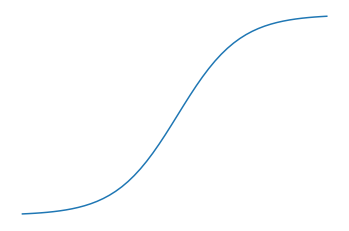

In [ ]:
def logistic_func(x): return np.e**x/(np.e**x + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(-5, 5, 0.2), [logistic_func(x) for x in np.arange(-5, 5, 0.2)])
plt.axis('off')

### C. (10 marks) Experiment with activation functions 

#### Calculating the MSE loss 
#### Neural network has 2 hidden layers with 16 and 8 neurons respectively.
#### Activation function: tanh

In [ ]:
model6 = Sequential()
model6.add(Dense(16,activation = 'tanh',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model6.add(Dense(8,activation = 'tanh'))
model6.add(Dense(1))
model6.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model = model6.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 10s - loss: 58.8463 - mae: 3.5303 - mse: 58.8463 - mape: 27.8539 - val_loss: 27.6120 - val_mae: 2.4301 - val_mse: 27.6120 - val_mape: 22.6763 - 10s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 23.3596 - mae: 2.2446 - mse: 23.3596 - mape: 22.1031 - val_loss: 20.3992 - val_mae: 2.1689 - val_mse: 20.3992 - val_mape: 22.5685 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 20.8943 - mae: 2.1306 - mse: 20.8943 - mape: 21.9187 - val_loss: 19.8794 - val_mae: 2.1177 - val_mse: 19.8794 - val_mape: 21.7878 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 9s - loss: 20.5669 - mae: 2.1160 - mse: 20.5669 - mape: 21.9544 - val_loss: 19.6045 - val_mae: 2.0719 - val_mse: 19.6045 - val_mape: 21.2557 - 9s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 20.1555 - mae: 2.0883 - mse: 20.1555 - mape: 21.7756 - val_loss: 19.1214 - val_mae: 2.0200 - val_mse: 19.1214 - val_mape: 20.6280 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 19.7969 - mae: 2.0697 - mse: 19.7

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model6.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model6.predict(X_test_ss))}')

Train Score:19.4056099187136
Test Score:18.66270479161919


#### Calculating the MSE loss 
#### neural network has 2 hidden layers with 16 and 8 neurons respectively.
#### Activation function: relu

In [ ]:
model7 = Sequential()
model7.add(Dense(16,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model7.add(Dense(8,activation = 'relu'))
model7.add(Dense(1))
model7.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model7 = model7.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 11s - loss: 30.2392 - mae: 2.5367 - mse: 30.2392 - mape: 25.4569 - val_loss: 22.3247 - val_mae: 2.1669 - val_mse: 22.3247 - val_mape: 21.7247 - 11s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 21.6781 - mae: 2.1691 - mse: 21.6781 - mape: 22.1951 - val_loss: 20.0474 - val_mae: 2.1653 - val_mse: 20.0474 - val_mape: 22.6293 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 20.6062 - mae: 2.1383 - mse: 20.6062 - mape: 22.0189 - val_loss: 19.6370 - val_mae: 2.1193 - val_mse: 19.6370 - val_mape: 21.8278 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 20.3170 - mae: 2.1201 - mse: 20.3170 - mape: 21.8268 - val_loss: 19.5352 - val_mae: 2.0940 - val_mse: 19.5352 - val_mape: 21.1813 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 9s - loss: 20.1709 - mae: 2.1095 - mse: 20.1709 - mape: 21.6711 - val_loss: 19.3662 - val_mae: 2.0753 - val_mse: 19.3662 - val_mape: 20.9991 - 9s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 20.0816 - mae: 2.1068 - mse: 20.0

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model7.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model7.predict(X_test_ss))}')

Train Score:19.919556952833773
Test Score:19.342295217049163


#### calculating the mse loss
#### neural network has 2 hidden layers with 16 and 8 neurons respectively.
#### Activation function: softsign

In [ ]:
model8 = Sequential()
model8.add(Dense(16,activation = 'softsign',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model8.add(Dense(8,activation = 'softsign'))
model8.add(Dense(1))
model8.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model8 = model8.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 11s - loss: 63.3270 - mae: 3.8109 - mse: 63.3270 - mape: 30.6851 - val_loss: 29.5341 - val_mae: 2.4703 - val_mse: 29.5341 - val_mape: 21.3771 - 11s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 24.5739 - mae: 2.3328 - mse: 24.5739 - mape: 22.5783 - val_loss: 21.2532 - val_mae: 2.2327 - val_mse: 21.2532 - val_mape: 22.3242 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 21.6243 - mae: 2.2191 - mse: 21.6243 - mape: 22.7047 - val_loss: 20.8590 - val_mae: 2.1100 - val_mse: 20.8590 - val_mape: 19.5619 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 21.2670 - mae: 2.1971 - mse: 21.2670 - mape: 22.5977 - val_loss: 20.5225 - val_mae: 2.1070 - val_mse: 20.5225 - val_mape: 20.0626 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 21.1438 - mae: 2.1827 - mse: 21.1438 - mape: 22.4101 - val_loss: 20.1632 - val_mae: 2.1284 - val_mse: 20.1632 - val_mape: 21.3231 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 21.0473 - mae: 2.1725 - mse: 21

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model8.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model8.predict(X_test_ss))}')

Train Score:20.922296613264468
Test Score:20.107495076046636


#### calculating the mse loss
#### neural network has 2 hidden layers with 16 and 8 neurons respectively.
#### Activation function: elu

In [ ]:
model9 = Sequential()
model9.add(Dense(16,activation = 'elu',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model9.add(Dense(8,activation = 'elu'))
model9.add(Dense(1))
model9.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model9 = model9.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 11s - loss: 28.2877 - mae: 2.4723 - mse: 28.2877 - mape: 23.5142 - val_loss: 21.9993 - val_mae: 2.1694 - val_mse: 21.9993 - val_mape: 20.5873 - 11s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 21.9024 - mae: 2.1413 - mse: 21.9024 - mape: 20.7639 - val_loss: 20.4583 - val_mae: 2.1650 - val_mse: 20.4583 - val_mape: 21.9044 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 20.7109 - mae: 2.1105 - mse: 20.7109 - mape: 21.1949 - val_loss: 19.7366 - val_mae: 2.0969 - val_mse: 19.7366 - val_mape: 21.1848 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 20.3731 - mae: 2.1040 - mse: 20.3731 - mape: 21.3858 - val_loss: 19.8731 - val_mae: 2.0969 - val_mse: 19.8731 - val_mape: 20.9686 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 20.1830 - mae: 2.0939 - mse: 20.1830 - mape: 21.3852 - val_loss: 19.4782 - val_mae: 2.0591 - val_mse: 19.4782 - val_mape: 20.6750 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 20.0351 - mae: 2.0877 - mse: 20

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model9.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model9.predict(X_test_ss))}')

Train Score:19.864358082783337
Test Score:19.26340119529084



Comparison of Activation Functions: The figure above gives a comparison of how the RMSE value developed with the number of epochs for the Relu, tanh and sigmoid activation functions, when training our Manhattan NN Model. The activation functions all behaved similarly, and we had no reason to prefer any one in particular and decided to use a tanh activation function.


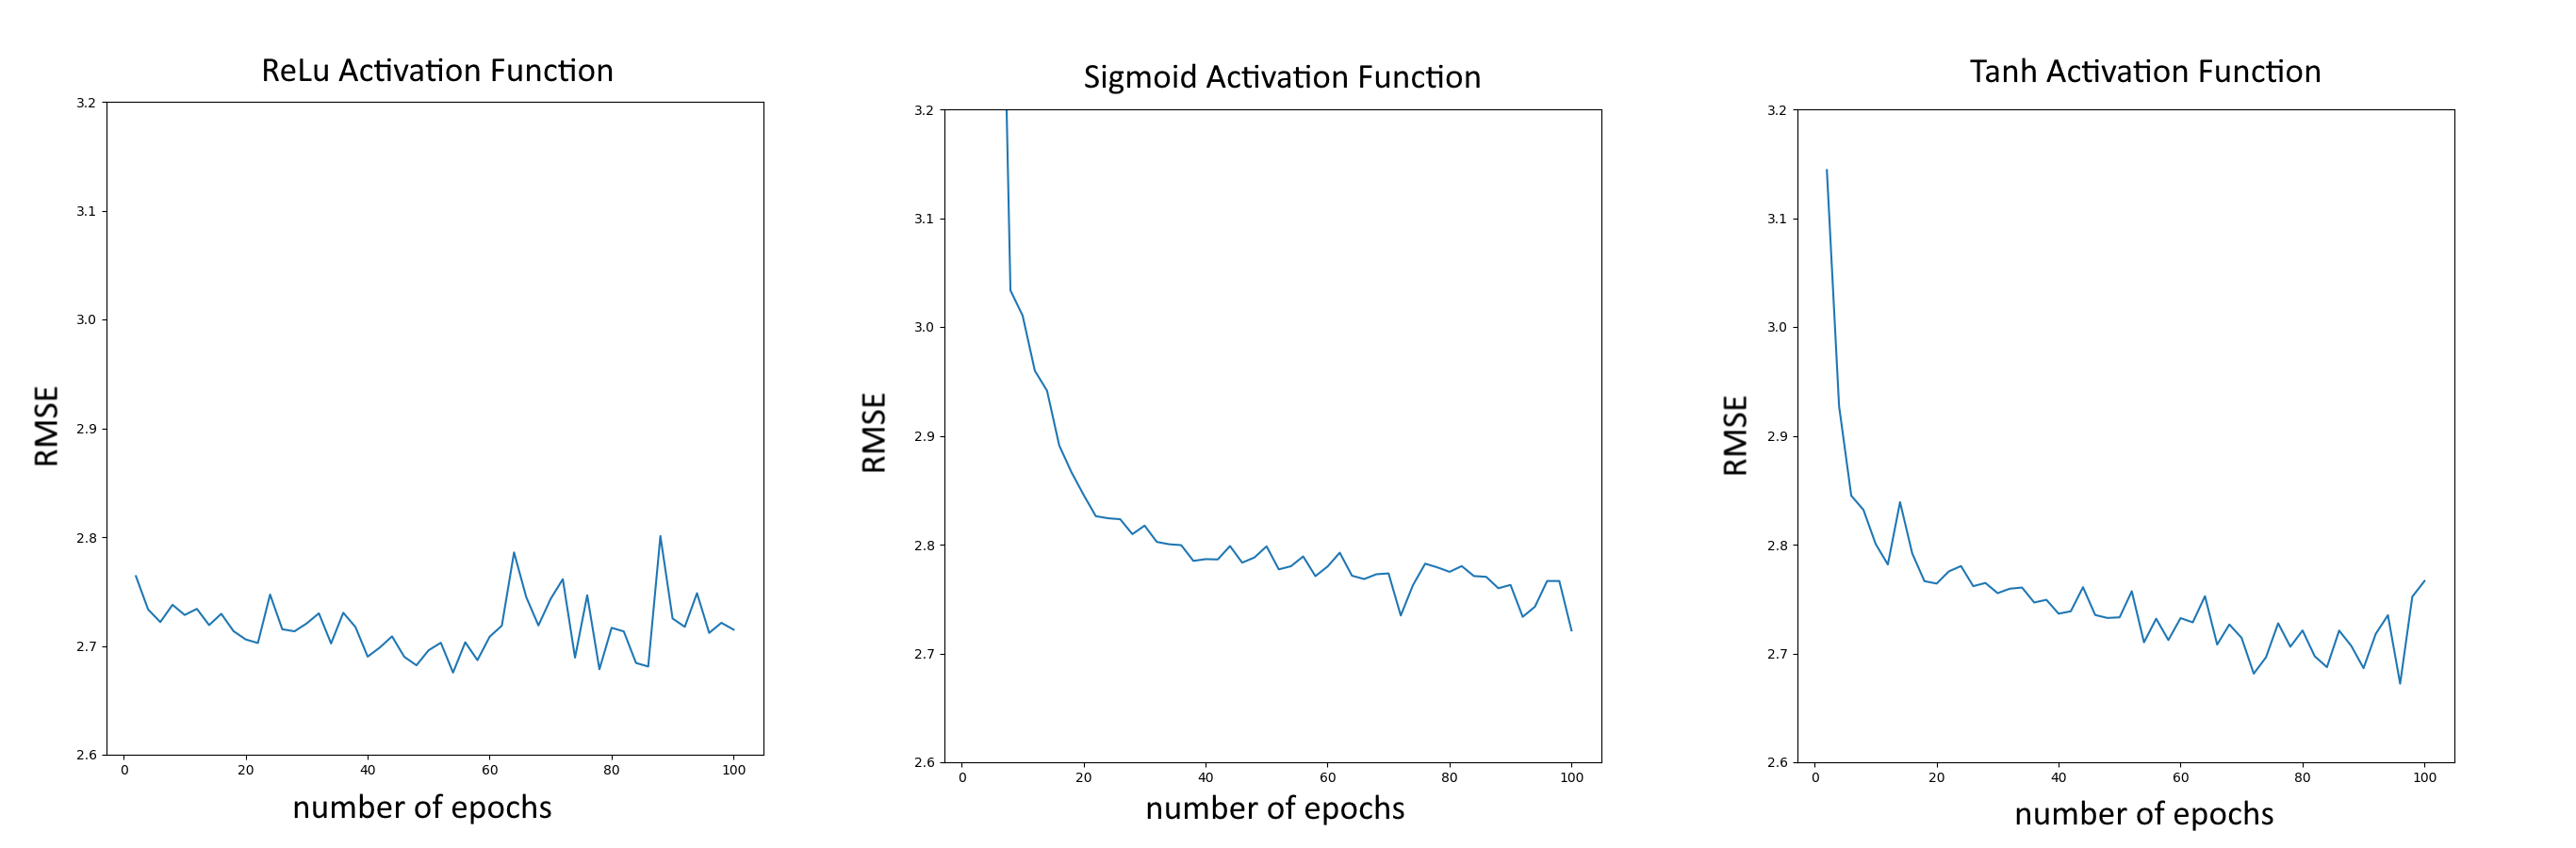

## D. (15 marks) Experiment with regularization techniques: Early stopping, Dropout rate

#### adding dropout=0.3 to the model
#### activation function as sigmoid

In [ ]:
model10 = Sequential()
model10.add(Dense(16,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model10.add(Dropout(0.3))
model10.add(Dense(8,activation = 'sigmoid'))
model10.add(Dense(1))
model10.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model10 = model10.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 11s - loss: 92.3021 - mae: 5.0233 - mse: 92.3021 - mape: 39.7041 - val_loss: 43.4581 - val_mae: 3.0162 - val_mse: 43.4581 - val_mape: 26.2913 - 11s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 31.8897 - mae: 2.6885 - mse: 31.8897 - mape: 25.5653 - val_loss: 23.3540 - val_mae: 2.3827 - val_mse: 23.3540 - val_mape: 24.2296 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 23.4229 - mae: 2.4008 - mse: 23.4229 - mape: 24.5455 - val_loss: 20.6399 - val_mae: 2.2061 - val_mse: 20.6399 - val_mape: 22.6926 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 22.3791 - mae: 2.3341 - mse: 22.3791 - mape: 24.1249 - val_loss: 20.4151 - val_mae: 2.1925 - val_mse: 20.4151 - val_mape: 22.5888 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 22.2051 - mae: 2.3169 - mse: 22.2051 - mape: 23.9062 - val_loss: 20.3591 - val_mae: 2.1915 - val_mse: 20.3591 - val_mape: 22.6416 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 22.0306 - mae: 2.3033 - mse: 22

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model10.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model10.predict(X_test_ss))}')

Train Score:21.056697701183502
Test Score:20.25563715127119


## Tabulate the 95% confidence intervals of each of the 3 metrics from each of the parts above neatly based on at least 5 experiments on validation.


#### Applying early stopping with patience=3 and dropout=0.3

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model11 = Sequential()
model11.add(Dense(16,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model11.add(Dropout(0.3))
model11.add(Dense(8,activation = 'sigmoid'))
model11.add(Dense(1))
model11.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model11 = model11.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 10s - loss: 109.0595 - mae: 5.6949 - mse: 109.0595 - mape: 43.9009 - val_loss: 58.9840 - val_mae: 3.4591 - val_mse: 58.9840 - val_mape: 27.3424 - 10s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 42.6676 - mae: 2.9943 - mse: 42.6676 - mape: 26.2622 - val_loss: 29.5381 - val_mae: 2.5195 - val_mse: 29.5381 - val_mape: 23.5193 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 26.7108 - mae: 2.5136 - mse: 26.7108 - mape: 24.6561 - val_loss: 22.1665 - val_mae: 2.3194 - val_mse: 22.1665 - val_mape: 23.6614 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 23.1000 - mae: 2.3685 - mse: 23.1000 - mape: 24.1732 - val_loss: 20.6870 - val_mae: 2.2129 - val_mse: 20.6870 - val_mape: 22.8583 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 22.3368 - mae: 2.3185 - mse: 22.3368 - mape: 23.8682 - val_loss: 20.4066 - val_mae: 2.1889 - val_mse: 20.4066 - val_mape: 22.5568 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 22.1155 - mae: 2.3010 - mse: 

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model11.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model11.predict(X_test_ss))}')

Train Score:21.126765773748005
Test Score:20.315663997780284


## D. (15 marks) Experiment with regularization techniques: Early stopping, Dropout rate

### Optimization (optimizer adam)

- With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

- In Keras, there are several choices for optimizers. The most commonly used optimizers are; **Stochastic Gradient Descent (SGD)**, **Adaptive Moments (Adam)** and **Root Mean Squared Propagation (RMSprop)**. 

- Each optimizer features tunable parameters like learning rate, momentum, and decay. 

- Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

## E. (10 marks) Experiment with at least 2 more Optimizers

#### calculating the mse loss
#### neural network has 2 hidden layers with 16 and 8 neurons respectively.
#### Activation function: sigmoid
### Optimizer: SGD

In [ ]:
model12 = Sequential()
model12.add(Dense(16,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model12.add(Dense(8,activation = 'sigmoid'))
model12.add(Dense(1))
model12.compile(loss = 'mse',optimizer = 'SGD',metrics = ['mae','mse','mape'])
history_model12 = model12.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 11s - loss: 23.6343 - mae: 2.3285 - mse: 23.6343 - mape: 23.8687 - val_loss: 20.9836 - val_mae: 2.2309 - val_mse: 20.9836 - val_mape: 22.7322 - 11s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 21.0868 - mae: 2.1767 - mse: 21.0868 - mape: 22.2845 - val_loss: 20.3755 - val_mae: 2.1306 - val_mse: 20.3755 - val_mape: 21.2101 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 20.8949 - mae: 2.1497 - mse: 20.8949 - mape: 22.0779 - val_loss: 19.7464 - val_mae: 2.1022 - val_mse: 19.7464 - val_mape: 21.6462 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 20.5059 - mae: 2.1010 - mse: 20.5059 - mape: 21.6545 - val_loss: 19.4921 - val_mae: 2.0821 - val_mse: 19.4921 - val_mape: 21.4775 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 9s - loss: 20.2914 - mae: 2.0771 - mse: 20.2914 - mape: 21.4570 - val_loss: 19.8025 - val_mae: 2.1751 - val_mse: 19.8025 - val_mape: 22.9454 - 9s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 20.1380 - mae: 2.0616 - mse: 20.1

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model12.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model12.predict(X_test_ss))}')

Train Score:19.951352787451576
Test Score:19.192778015734373


### Metrics (accuracy)

- Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss. 

- During training, validation, and testing, other metrics such as **accuracy** can also be included. 

- **Accuracy** is the percent, or fraction, of correct predictions based on ground truth.

#### calculating the mse loss
#### neural network has 2 hidden layers with 16 and 8 neurons respectively.
#### Activation function: sigmoid
#### Optimizer: Ftrl

In [ ]:
model13 = Sequential()
model13.add(Dense(16,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model13.add(Dense(8,activation = 'sigmoid'))
model13.add(Dense(1))
model13.compile(loss = 'mse',optimizer = 'Ftrl',metrics = ['mae','mse','mape'])
history_model13 = model13.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 11s - loss: 187.9994 - mae: 9.8120 - mse: 187.9994 - mape: 81.0599 - val_loss: 176.5327 - val_mae: 9.2606 - val_mse: 176.5327 - val_mape: 74.3091 - 11s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 171.7602 - mae: 8.9749 - mse: 171.7602 - mape: 70.5827 - val_loss: 166.6022 - val_mae: 8.7125 - val_mse: 166.6022 - val_mape: 67.4169 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 163.9362 - mae: 8.5294 - mse: 163.9362 - mape: 64.9923 - val_loss: 160.2390 - val_mae: 8.3386 - val_mse: 160.2390 - val_mape: 62.7532 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 9s - loss: 158.2960 - mae: 8.1923 - mse: 158.2960 - mape: 60.8062 - val_loss: 155.1696 - val_mae: 8.0302 - val_mse: 155.1696 - val_mape: 58.9488 - 9s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 153.6381 - mae: 7.9054 - mse: 153.6381 - mape: 57.2926 - val_loss: 150.9130 - val_mae: 7.7646 - val_mse: 150.9130 - val_mape: 55.7274 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 9s - loss: 149.7254 - mae

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model13.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model13.predict(X_test_ss))}')

Train Score:144.91412562950296
Test Score:144.26936916616563


#### calculating the mse loss
#### neural network has 2 hidden layers with 16 and 8 neurons respectively.
#### Activation function: sigmoid
#### Optimizer: Adagrad

In [ ]:
model14 = Sequential()
model14.add(Dense(16,activation = 'sigmoid',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
model14.add(Dense(8,activation = 'sigmoid'))
model14.add(Dense(1))
model14.compile(loss = 'mse',optimizer = 'Adagrad',metrics = ['mae','mse','mape'])
history_model14 = model14.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 10s - loss: 195.8697 - mae: 10.1944 - mse: 195.8697 - mape: 85.8223 - val_loss: 184.2144 - val_mae: 9.6522 - val_mse: 184.2144 - val_mape: 79.1904 - 10s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 178.8448 - mae: 9.3488 - mse: 178.8448 - mape: 75.2495 - val_loss: 173.1028 - val_mae: 9.0669 - val_mse: 173.1028 - val_mape: 71.8390 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 10s - loss: 169.9536 - mae: 8.8642 - mse: 169.9536 - mape: 69.1400 - val_loss: 165.7860 - val_mae: 8.6538 - val_mse: 165.7860 - val_mape: 66.6336 - 10s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 9s - loss: 163.3903 - mae: 8.4864 - mse: 163.3903 - mape: 64.4069 - val_loss: 159.7836 - val_mae: 8.3015 - val_mse: 159.7836 - val_mape: 62.2483 - 9s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 9s - loss: 157.7910 - mae: 8.1533 - mse: 157.7910 - mape: 60.2881 - val_loss: 154.6160 - val_mae: 7.9889 - val_mse: 154.6160 - val_mape: 58.4103 - 9s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 9s - loss: 153.0510 - mae:

In [ ]:
print(f'Train Score:{mean_squared_error(y_train,model14.predict(X_train_ss))}')
print(f'Test Score:{mean_squared_error(y_test,model14.predict(X_test_ss))}')

Train Score:147.313845748648
Test Score:146.66527294882468


#### The best mse loss is 20.07, where the model's hyperparameters are:
#### 2 hidden layers with 16 and 8 neurons respectively
#### activation function: tanh

In [ ]:
final_model = Sequential()
final_model.add(Dense(16,activation = 'tanh',kernel_initializer = 'normal',input_dim = X_train_ss.shape[1]))
final_model.add(Dense(8,activation = 'tanh'))
final_model.add(Dense(1))
final_model.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])
history_model = final_model.fit(X_train_ss,y_train, epochs = 7, batch_size = 128, validation_data = (X_test_ss,y_test),verbose = 2)

Epoch 1/7
5740/5740 - 10s - loss: 58.0160 - mae: 3.4902 - mse: 58.0160 - mape: 27.3835 - val_loss: 27.2720 - val_mae: 2.4131 - val_mse: 27.2720 - val_mape: 22.1897 - 10s/epoch - 2ms/step
Epoch 2/7
5740/5740 - 10s - loss: 23.2750 - mae: 2.2424 - mse: 23.2750 - mape: 22.0564 - val_loss: 20.4900 - val_mae: 2.1741 - val_mse: 20.4900 - val_mape: 22.4659 - 10s/epoch - 2ms/step
Epoch 3/7
5740/5740 - 9s - loss: 20.9031 - mae: 2.1310 - mse: 20.9031 - mape: 21.8082 - val_loss: 19.7252 - val_mae: 2.1179 - val_mse: 19.7252 - val_mape: 21.8424 - 9s/epoch - 2ms/step
Epoch 4/7
5740/5740 - 10s - loss: 20.4585 - mae: 2.1047 - mse: 20.4585 - mape: 21.6543 - val_loss: 19.4683 - val_mae: 2.0455 - val_mse: 19.4683 - val_mape: 20.4480 - 10s/epoch - 2ms/step
Epoch 5/7
5740/5740 - 10s - loss: 20.2514 - mae: 2.0826 - mse: 20.2514 - mape: 21.4426 - val_loss: 19.3644 - val_mae: 2.0802 - val_mse: 19.3644 - val_mape: 21.5317 - 10s/epoch - 2ms/step
Epoch 6/7
5740/5740 - 10s - loss: 20.1467 - mae: 2.0729 - mse: 20.1

## Test set final prediction:

In [ ]:
ss = StandardScaler()
ss.fit(X)
X_ss = ss.transform(X)
test_my_dataframe_ss = ss.transform(testdf.iloc[:,2:])

In [ ]:
print(f'Shape of X: {X_ss.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (979618, 8)
Shape of y: (979618,)


In [ ]:
ann_prediction = pd.DataFrame({"key": testdf['key'], "fare_amount":final_model.predict(test_my_dataframe_ss).flatten()})
ann_prediction.to_csv("my_final_submission", index=False)

310/310 [==============================] - 0s 782us/step


In [ ]:
final_model = Sequential()
final_model.add(Dense(64,activation = 'relu',kernel_initializer = 'normal',input_dim = X_ss.shape[1]))
final_model.add(Dropout(0.3))
final_model.add(Dense(3,activation = 'relu'))
final_model.add(Dense(1))
final_model.compile(loss = 'mse',optimizer = 'adam',metrics = 'mae')
history_final_model = final_model.fit(X_ss,y, epochs = 100, batch_size = 50000,verbose = 2)

Epoch 1/100
20/20 - 1s - loss: 220.0970 - mae: 11.3110 - 1s/epoch - 52ms/step
Epoch 2/100
20/20 - 1s - loss: 216.2257 - mae: 11.1671 - 706ms/epoch - 35ms/step
Epoch 3/100
20/20 - 1s - loss: 211.4902 - mae: 10.9892 - 703ms/epoch - 35ms/step
Epoch 4/100
20/20 - 1s - loss: 205.1654 - mae: 10.7523 - 705ms/epoch - 35ms/step
Epoch 5/100
20/20 - 1s - loss: 196.6974 - mae: 10.4389 - 710ms/epoch - 35ms/step
Epoch 6/100
20/20 - 1s - loss: 185.3697 - mae: 10.0176 - 705ms/epoch - 35ms/step
Epoch 7/100
20/20 - 1s - loss: 170.9553 - mae: 9.4629 - 711ms/epoch - 36ms/step
Epoch 8/100
20/20 - 1s - loss: 153.4986 - mae: 8.7606 - 711ms/epoch - 36ms/step
Epoch 9/100
20/20 - 1s - loss: 133.7306 - mae: 7.9112 - 712ms/epoch - 36ms/step
Epoch 10/100
20/20 - 1s - loss: 111.8265 - mae: 6.9142 - 699ms/epoch - 35ms/step
Epoch 11/100
20/20 - 1s - loss: 88.7544 - mae: 5.8185 - 712ms/epoch - 36ms/step
Epoch 12/100
20/20 - 1s - loss: 67.9653 - mae: 4.8162 - 710ms/epoch - 36ms/step
Epoch 13/100
20/20 - 1s - loss: 52.5

In [ ]:
ann_prediction = pd.DataFrame({"key": testdf['key'], "fare_amount":final_model.predict(test_my_dataframe_ss).flatten()})
ann_prediction.to_csv("taxi_fare_prediction.csv", index=False)

310/310 [==============================] - 1s 2ms/step


Saving the prediction in the taxi_fare_prediction file

# Part 2: Breaking hcaptcha

In [ ]:
import os                      
classes = os.listdir("hcaptcha_dataset/train/")
print(classes)

['boat', 'motorcycle', 'airplane', 'truck', 'seaplane', 'bicycle', 'motorbus']


There are 7 classes to the dataset.\ Taking 20% data as Testing and taking the remaining 80% for Training.

For splitting out dataset into 2 categories we will use the split-folders package in python. It can be downloaded using pip install split-folders

In [ ]:
%%capture
!pip install split-folders

In [ ]:
%%capture
import splitfolders
splitfolders.ratio("hcaptcha_dataset/train/", output="./", seed=1337, ratio=(0.8, 0.2))

In [ ]:
os.listdir("./train")

['boat', 'motorcycle', 'airplane', 'truck', 'seaplane', 'bicycle', 'motorbus']

In [ ]:
os.listdir("./val")

['boat', 'motorcycle', 'airplane', 'truck', 'seaplane', 'bicycle', 'motorbus']

## (20 marks) Create a baseline Neural network with the following specifications.


In [ ]:
labels = os.listdir("./train")
print(labels)

['boat', 'motorcycle', 'airplane', 'truck', 'seaplane', 'bicycle', 'motorbus']


labels in dataset

In [ ]:
import pandas as pd

names=[]
my_train=[]
my_test=[]
my_total = []

for name in labels:
    im_num_train = len(os.listdir(f"./train/{name}"))
    im_num_test = len(os.listdir(f"./val/{name}"))
    
    names.append(name)
    my_train.append(im_num_train)
    my_test.append(im_num_test)
    my_total.append(im_num_train+im_num_test)
dic = {'Label': names, 'Number(training)': my_train, 'Number(testing)': my_test, 'Total': my_total} 
    
my_dataframe = pd.DataFrame(dic)
my_dataframe

,Label,Number(training),Number(testing),Total
0,boat,422,106,528
1,motorcycle,473,119,592
2,airplane,321,81,402
3,truck,524,132,656
4,seaplane,224,56,280
5,bicycle,243,61,304
6,motorbus,204,52,256


No of images belonging to each class

In [ ]:
print(f"Total training images: {my_dataframe['Number(training)'].sum()}")
print(f"Total testing images: {my_dataframe['Number(testing)'].sum()}")

Total training images: 2411
Total testing images: 607


Write a function to display a random image and its shape. Find out whether the shape of each image is the same or not. If not then make all images of the same shape.

In [ ]:
import random
def random_image(path):      
    labels = os.listdir(path)
    random_label = random.choice(labels)

    image_with_choson_label = os.listdir(f"./train/{random_label}")
    random_image = random.choice(image_with_choson_label)
    img_path = f"./train/{random_label}/{random_image}"
    print(random_label)
    return img_path

In [ ]:
import matplotlib.pyplot as plt
labels = os.listdir("./train")

size = {}
for label in labels:
    images = os.listdir(f"./train/{label}")
    for image in images:    
        img = plt.imread(f"./train/{label}/{image}")
        if img.shape not in size:
            size[img.shape]=1
        else:
            size[img.shape]+=1

print(size)

{(128, 128): 2411}


Running the above code shows us there are 2 different file dimensions.

In [ ]:
from PIL import Image
import cv2

for label in labels:
    images = os.listdir(f"./train/{label}")
    for image in images:    
        img = cv2.imread(f"./train/{label}/{image}")
        try:
            if img.shape == list(size)[1]:
                img = cv2.resize(img, dsize=(128, 128), interpolation=cv2.INTER_AREA)
                cv2.imwrite(f"./train/{label}/{image}", img)
        except:
            continue

In [ ]:
labels = os.listdir("./train")

size = {}
for label in labels:
    images = os.listdir(f"./train/{label}")
    for image in images:    
        img = plt.imread(f"./train/{label}/{image}")
        if img.shape not in size:
            size[img.shape]=1
        else:
            size[img.shape]+=1

print(size)
my_train = list(size.values())[0]
print(my_train)

{(128, 128): 2411}
2411


We maked all the images dimension = 128x128x3

In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt


for label in labels:
    images = os.listdir(f"./train/{label}")
    for image in images:
        try:
            img = cv2.imread(f"./train/{label}/{image}")
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(f"./train/{label}/{image}", gray)
        except:
            continue

motorbus


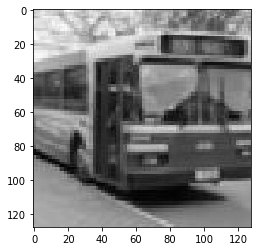

In [ ]:
import PIL
import matplotlib.pyplot as plt

img_check = random_image("./train")
img = PIL.Image.open(img_check)
gray_img = img.convert("L")
plt.imshow(gray_img, cmap='gray')

Image normalization is a typical process in image processing that changes the range of pixel intensity values. Its normal purpose is to convert an input image into a range of pixel values that are more familiar or normal to the senses, hence the term normalization.

Image data should be normalised when we want the model to be brightness invariant. There are chances some images are clicked in dim lighting conditions while some were clicked in bright illumination. Normalisation will help all image to weight equally irrespective of illumination. We should definately normalise our color channels.

Let us find the mean and standard deviation of pixel intensity.

In [ ]:
labels = os.listdir("./train")

maximum_pixel_intensity = float("-inf")
minimum_pixel_intensity = float("inf")
mean_pixel_intensity = 0
std_pixel_intensity = 0

for label in labels:
    images = os.listdir(f"./train/{label}")
    for image in images:    
        img = plt.imread(f"./train/{label}/{image}",cv2.IMREAD_UNCHANGED)
        if minimum_pixel_intensity>img.min():
            minimum_pixel_intensity = img.min() 
        if maximum_pixel_intensity < img.max():
            maximum_pixel_intensity = img.max()
        mean_pixel_intensity+=img.sum()
mean_pixel_intensity = mean_pixel_intensity/(128*128*my_train)  

std_pixel_intensity = 0
sum_diff = 0

for label in labels:
    images = os.listdir(f"./train/{label}")
    for image in images:    
        img = plt.imread(f"./train/{label}/{image}",cv2.IMREAD_UNCHANGED)
        temp = ((img.sum()/(128*128))-mean_pixel_intensity)**2
        sum_diff+=temp
std_pixel_intensity = (sum_diff/(my_train))**(1/2)

print("minimum_pixel_intensity: ", minimum_pixel_intensity)
print("maximum_pixel_intensity: ", maximum_pixel_intensity)
print("mean_pixel_intensity:", mean_pixel_intensity)
print("std_pixel_intensity: ",std_pixel_intensity)

minimum_pixel_intensity:  0
maximum_pixel_intensity:  255
mean_pixel_intensity: 137.64696161878499
std_pixel_intensity:  33.24571848596172


We can pre-process our images in three ways. One of them is pixel scaling. The three main types of pixel scaling techniques as follows:

Pixel Normalization: scale pixel values to the range 0-1.

Pixel Centering: scale pixel values to have a zero mean.

Pixel Standardization: scale pixel values to have a zero mean and unit variance.

Dividing all pixel values by 255 to bring them betweeen 0 and 1.
Reducing the image dimensions to 28x28

In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

def resize_and_normalise(img_path):
    img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    img = cv2.resize(img, dsize=(40, 40), interpolation = cv2.INTER_AREA)
    img_resized = img / 255
    return img_resized

In [ ]:
import os
classes = os.listdir("./train")
print(classes)

['boat', 'motorcycle', 'airplane', 'truck', 'seaplane', 'bicycle', 'motorbus']


In [ ]:
my_dataframe

,Label,Number(training),Number(testing),Total
0,boat,422,106,528
1,motorcycle,473,119,592
2,airplane,321,81,402
3,truck,524,132,656
4,seaplane,224,56,280
5,bicycle,243,61,304
6,motorbus,204,52,256


As we can see after splitting into test and train the number of images in each class are different.The problem with such a datset is that models trained on it wll be biased towards the more occuring classes. There will no propoer representation of minority classes in both validation and training.

Balanced training sample become very important.

There are several ways to tackle this unbalanced data problem. 2 basic ones are:

Undersampling the majority classes
Oversampling the minority classes
Apart from this we can also take balanced subsets of the datset during training.

To ensure that every fold contains images from each class and no duplicates, We can use stratified k-fold cross-validation which is the same as just k-fold cross-validation, But Stratified k-fold cross-validation, it does stratified sampling instead of random sampling. Here we are working on the original dataset only without augmenting the dataset.

In [ ]:
class_number = 0
num_classes = len(os.listdir("./train"))
count = 0

x_train = []
y_train = []


for classes in os.listdir("./train"):
    y_array = class_number
    all_images = os.listdir(f"./train/{classes}")
    tot = len(all_images)
    count = 0
    for images in all_images:
        try:
            img = resize_and_normalise(f"./train/{classes}/{images}")
            x_train.append(img)
            y_train.append(y_array)
            count+=1
        except:
            continue
    class_number+=1
    print(f"Class {classes} processessing done")

print("All classes have been processed")

Class boat processessing done
Class motorcycle processessing done
Class airplane processessing done
Class truck processessing done
Class seaplane processessing done
Class bicycle processessing done
Class motorbus processessing done
All classes have been processed


In [ ]:
import numpy as np
x_train =  (np.array(x_train).reshape(np.array(x_train).shape[0],-1))
y_train = np.array(y_train)
print(x_train.shape,y_train.shape)

(2411, 1600) (2411,)


In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(
      x_train, y_train, test_size = 0.30)

In [ ]:
X_test.shape

(724, 1600)

#### Training a neural network with 4 layers
#### number of neurons = 1024,256,64,7 respectively
#### batch size=128 for gradient descent 
#### activation function is sigmoid.

In [ ]:
model1 = Sequential()
model1.add(Dense(1024,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model1.add(Dense(256,activation = 'relu'))
model1.add(Dense(64,activation = 'relu'))
model1.add(Dense(7,activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')
history_model1 = model1.fit(X_train,Y_train, epochs = 80, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)
best_score = max(history_model1.history['accuracy'])
print("The best accuracy is",best_score)

Epoch 1/80
14/14 - 5s - loss: 1.8784 - accuracy: 0.2833 - val_loss: 1.4411 - val_accuracy: 0.4641 - 5s/epoch - 336ms/step
Epoch 2/80
14/14 - 0s - loss: 1.3137 - accuracy: 0.5157 - val_loss: 1.2624 - val_accuracy: 0.5594 - 322ms/epoch - 23ms/step
Epoch 3/80
14/14 - 0s - loss: 1.1572 - accuracy: 0.5726 - val_loss: 1.1012 - val_accuracy: 0.6215 - 291ms/epoch - 21ms/step
Epoch 4/80
14/14 - 0s - loss: 1.0287 - accuracy: 0.6574 - val_loss: 0.9593 - val_accuracy: 0.6823 - 302ms/epoch - 22ms/step
Epoch 5/80
14/14 - 0s - loss: 0.9386 - accuracy: 0.6752 - val_loss: 1.0864 - val_accuracy: 0.6298 - 298ms/epoch - 21ms/step
Epoch 6/80
14/14 - 0s - loss: 0.9374 - accuracy: 0.6740 - val_loss: 0.8359 - val_accuracy: 0.7251 - 256ms/epoch - 18ms/step
Epoch 7/80
14/14 - 0s - loss: 0.8105 - accuracy: 0.7196 - val_loss: 0.8082 - val_accuracy: 0.7141 - 274ms/epoch - 20ms/step
Epoch 8/80
14/14 - 0s - loss: 0.7447 - accuracy: 0.7475 - val_loss: 0.7693 - val_accuracy: 0.7334 - 252ms/epoch - 18ms/step
Epoch 9/80

Epoch 67/80
14/14 - 0s - loss: 0.1560 - accuracy: 0.9467 - val_loss: 0.6250 - val_accuracy: 0.8108 - 391ms/epoch - 28ms/step
Epoch 68/80
14/14 - 0s - loss: 0.0900 - accuracy: 0.9751 - val_loss: 0.7181 - val_accuracy: 0.7956 - 279ms/epoch - 20ms/step
Epoch 69/80
14/14 - 0s - loss: 0.0785 - accuracy: 0.9775 - val_loss: 0.5787 - val_accuracy: 0.8287 - 231ms/epoch - 17ms/step
Epoch 70/80
14/14 - 0s - loss: 0.0674 - accuracy: 0.9787 - val_loss: 0.5933 - val_accuracy: 0.8122 - 262ms/epoch - 19ms/step
Epoch 71/80
14/14 - 0s - loss: 0.0549 - accuracy: 0.9846 - val_loss: 0.6644 - val_accuracy: 0.8218 - 275ms/epoch - 20ms/step
Epoch 72/80
14/14 - 0s - loss: 0.0516 - accuracy: 0.9852 - val_loss: 0.6349 - val_accuracy: 0.8149 - 258ms/epoch - 18ms/step
Epoch 73/80
14/14 - 0s - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.7908 - val_accuracy: 0.7762 - 316ms/epoch - 23ms/step
Epoch 74/80
14/14 - 0s - loss: 0.0741 - accuracy: 0.9793 - val_loss: 0.7070 - val_accuracy: 0.8260 - 409ms/epoch - 29ms/step


In [ ]:
pred = tf.argmax(model1.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 7ms/step
Macro score: 0.8022271103574308
Recall Score 0.757670675247035


## Macro score: 0.8364602156139574

## PLAYING WITH NUMBER OF LAYERS AND NUMBER OF NEURONS PER LAYER

### number of layers=8

### neurons per layer=512,256,128,64,32,24,16,7 respectively

In [ ]:
model2 = Sequential()
model2.add(Dense(512,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model2.add(Dense(256,activation = 'relu'))
model2.add(Dense(128,activation = 'relu'))
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(32,activation = 'relu'))
model2.add(Dense(24,activation = 'relu'))
model2.add(Dense(16,activation = 'relu'))
model2.add(Dense(7,activation="softmax"))
model2.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = "accuracy")
history_model2 = model2.fit(X_train,Y_train, epochs = 80, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)
best_score = max(history_model2.history['accuracy'])
print("The best accuracy is",best_score)

Epoch 1/80
14/14 - 2s - loss: 1.8836 - accuracy: 0.2075 - val_loss: 1.8493 - val_accuracy: 0.2749 - 2s/epoch - 146ms/step
Epoch 2/80
14/14 - 0s - loss: 1.7320 - accuracy: 0.3308 - val_loss: 1.6394 - val_accuracy: 0.4351 - 214ms/epoch - 15ms/step
Epoch 3/80
14/14 - 0s - loss: 1.5686 - accuracy: 0.4019 - val_loss: 1.4496 - val_accuracy: 0.4903 - 222ms/epoch - 16ms/step
Epoch 4/80
14/14 - 0s - loss: 1.3592 - accuracy: 0.5246 - val_loss: 1.2280 - val_accuracy: 0.5884 - 223ms/epoch - 16ms/step
Epoch 5/80
14/14 - 0s - loss: 1.1783 - accuracy: 0.5898 - val_loss: 1.2489 - val_accuracy: 0.5981 - 245ms/epoch - 18ms/step
Epoch 6/80
14/14 - 0s - loss: 1.1428 - accuracy: 0.5892 - val_loss: 1.0709 - val_accuracy: 0.6133 - 233ms/epoch - 17ms/step
Epoch 7/80
14/14 - 0s - loss: 0.9865 - accuracy: 0.6532 - val_loss: 1.2834 - val_accuracy: 0.5967 - 256ms/epoch - 18ms/step
Epoch 8/80
14/14 - 0s - loss: 1.0933 - accuracy: 0.5916 - val_loss: 1.0598 - val_accuracy: 0.6215 - 194ms/epoch - 14ms/step
Epoch 9/80

Epoch 67/80
14/14 - 0s - loss: 0.1704 - accuracy: 0.9372 - val_loss: 0.7383 - val_accuracy: 0.7997 - 198ms/epoch - 14ms/step
Epoch 68/80
14/14 - 0s - loss: 0.1621 - accuracy: 0.9443 - val_loss: 0.7388 - val_accuracy: 0.8094 - 283ms/epoch - 20ms/step
Epoch 69/80
14/14 - 0s - loss: 0.1866 - accuracy: 0.9336 - val_loss: 1.0057 - val_accuracy: 0.7500 - 185ms/epoch - 13ms/step
Epoch 70/80
14/14 - 0s - loss: 0.1959 - accuracy: 0.9259 - val_loss: 0.7766 - val_accuracy: 0.7928 - 175ms/epoch - 12ms/step
Epoch 71/80
14/14 - 0s - loss: 0.1812 - accuracy: 0.9318 - val_loss: 0.7811 - val_accuracy: 0.7721 - 228ms/epoch - 16ms/step
Epoch 72/80
14/14 - 0s - loss: 0.1346 - accuracy: 0.9579 - val_loss: 0.7882 - val_accuracy: 0.7970 - 204ms/epoch - 15ms/step
Epoch 73/80
14/14 - 0s - loss: 0.1063 - accuracy: 0.9668 - val_loss: 0.8213 - val_accuracy: 0.7928 - 176ms/epoch - 13ms/step
Epoch 74/80
14/14 - 0s - loss: 0.1373 - accuracy: 0.9585 - val_loss: 0.8229 - val_accuracy: 0.7831 - 171ms/epoch - 12ms/step


In [ ]:
pred = tf.argmax(model2.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 4ms/step
Macro score: 0.7815235579726233
Recall Score 0.7711273025523229


## Macro score: 0.8155478541691441

### number of layers=3

### neurons per layer=2048,1024,7

In [ ]:
model3 = Sequential()
model3.add(Dense(2048,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model3.add(Dense(1024,activation = 'relu'))
model3.add(Dense(7,activation="softmax"))
model3.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = "accuracy")
history_model3 = model3.fit(X_train,Y_train, epochs = 70, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)
best_score = max(history_model3.history['accuracy'])
print("The best accuracy is",best_score)

Epoch 1/70
14/14 - 1s - loss: 4.9443 - accuracy: 0.2733 - val_loss: 1.4590 - val_accuracy: 0.4931 - 1s/epoch - 79ms/step
Epoch 2/70
14/14 - 1s - loss: 1.2435 - accuracy: 0.5471 - val_loss: 1.1247 - val_accuracy: 0.5801 - 733ms/epoch - 52ms/step
Epoch 3/70
14/14 - 1s - loss: 1.0178 - accuracy: 0.6313 - val_loss: 1.0325 - val_accuracy: 0.5856 - 741ms/epoch - 53ms/step
Epoch 4/70
14/14 - 1s - loss: 0.9194 - accuracy: 0.6663 - val_loss: 0.9200 - val_accuracy: 0.6851 - 599ms/epoch - 43ms/step
Epoch 5/70
14/14 - 1s - loss: 0.8277 - accuracy: 0.7143 - val_loss: 0.8911 - val_accuracy: 0.6851 - 601ms/epoch - 43ms/step
Epoch 6/70
14/14 - 1s - loss: 0.8133 - accuracy: 0.7155 - val_loss: 0.8394 - val_accuracy: 0.6823 - 600ms/epoch - 43ms/step
Epoch 7/70
14/14 - 1s - loss: 0.7544 - accuracy: 0.7273 - val_loss: 0.7456 - val_accuracy: 0.7597 - 686ms/epoch - 49ms/step
Epoch 8/70
14/14 - 1s - loss: 0.6762 - accuracy: 0.7742 - val_loss: 0.6908 - val_accuracy: 0.7680 - 618ms/epoch - 44ms/step
Epoch 9/70


Epoch 67/70
14/14 - 1s - loss: 0.0613 - accuracy: 0.9816 - val_loss: 0.6979 - val_accuracy: 0.8052 - 594ms/epoch - 42ms/step
Epoch 68/70
14/14 - 1s - loss: 0.0509 - accuracy: 0.9858 - val_loss: 0.7095 - val_accuracy: 0.8052 - 599ms/epoch - 43ms/step
Epoch 69/70
14/14 - 1s - loss: 0.0359 - accuracy: 0.9929 - val_loss: 0.6836 - val_accuracy: 0.8218 - 627ms/epoch - 45ms/step
Epoch 70/70
14/14 - 1s - loss: 0.0212 - accuracy: 0.9953 - val_loss: 0.6140 - val_accuracy: 0.8370 - 588ms/epoch - 42ms/step
The best accuracy is 0.9952578544616699


In [ ]:
pred = tf.argmax(model3.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 6ms/step
Macro score: 0.8385117760007484
Recall Score 0.8245976209524837


## Macro score: 0.8389959148430156

## Playing with Activation functions

Activation function: sigmoid

In [ ]:
model4 = Sequential()
model4.add(Dense(1024,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model4.add(Dense(256,activation = 'relu'))
model4.add(Dense(64,activation = 'relu'))
model4.add(Dense(7,activation="sigmoid"))
model4.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')
history_model4 = model4.fit(X_train,Y_train, epochs = 80, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)
best_score = max(history_model4.history['accuracy'])
print("The best accuracy is",best_score)

Epoch 1/80
14/14 - 1s - loss: 2.0629 - accuracy: 0.3065 - val_loss: 1.4050 - val_accuracy: 0.5014 - 613ms/epoch - 44ms/step
Epoch 2/80
14/14 - 0s - loss: 1.3521 - accuracy: 0.4956 - val_loss: 1.3407 - val_accuracy: 0.4655 - 249ms/epoch - 18ms/step
Epoch 3/80
14/14 - 0s - loss: 1.2340 - accuracy: 0.5376 - val_loss: 1.1006 - val_accuracy: 0.5994 - 243ms/epoch - 17ms/step
Epoch 4/80
14/14 - 0s - loss: 1.0638 - accuracy: 0.6129 - val_loss: 1.0017 - val_accuracy: 0.6671 - 245ms/epoch - 18ms/step
Epoch 5/80
14/14 - 0s - loss: 0.9726 - accuracy: 0.6520 - val_loss: 0.9510 - val_accuracy: 0.6727 - 238ms/epoch - 17ms/step
Epoch 6/80
14/14 - 0s - loss: 0.9071 - accuracy: 0.6912 - val_loss: 0.9377 - val_accuracy: 0.6699 - 243ms/epoch - 17ms/step
Epoch 7/80
14/14 - 0s - loss: 0.8721 - accuracy: 0.6971 - val_loss: 0.8465 - val_accuracy: 0.7265 - 238ms/epoch - 17ms/step
Epoch 8/80
14/14 - 0s - loss: 0.8203 - accuracy: 0.7178 - val_loss: 0.8851 - val_accuracy: 0.6837 - 241ms/epoch - 17ms/step
Epoch 9/

Epoch 67/80
14/14 - 0s - loss: 0.0640 - accuracy: 0.9822 - val_loss: 0.6532 - val_accuracy: 0.8204 - 235ms/epoch - 17ms/step
Epoch 68/80
14/14 - 0s - loss: 0.0782 - accuracy: 0.9733 - val_loss: 0.7958 - val_accuracy: 0.7887 - 235ms/epoch - 17ms/step
Epoch 69/80
14/14 - 0s - loss: 0.1547 - accuracy: 0.9419 - val_loss: 0.7822 - val_accuracy: 0.8108 - 231ms/epoch - 16ms/step
Epoch 70/80
14/14 - 0s - loss: 0.1708 - accuracy: 0.9401 - val_loss: 0.6984 - val_accuracy: 0.8025 - 231ms/epoch - 17ms/step
Epoch 71/80
14/14 - 0s - loss: 0.0994 - accuracy: 0.9650 - val_loss: 0.8157 - val_accuracy: 0.7887 - 232ms/epoch - 17ms/step
Epoch 72/80
14/14 - 0s - loss: 0.1121 - accuracy: 0.9579 - val_loss: 0.6513 - val_accuracy: 0.8232 - 234ms/epoch - 17ms/step
Epoch 73/80
14/14 - 0s - loss: 0.0980 - accuracy: 0.9650 - val_loss: 1.1459 - val_accuracy: 0.7638 - 308ms/epoch - 22ms/step
Epoch 74/80
14/14 - 0s - loss: 0.1793 - accuracy: 0.9360 - val_loss: 0.6848 - val_accuracy: 0.8177 - 230ms/epoch - 16ms/step


In [ ]:
pred = tf.argmax(model4.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 4ms/step
Macro score: 0.7992918455075158
Recall Score 0.7922083195982204


### Macro score: 0.7820051751980104

activation function : elu

In [ ]:
model5 = Sequential()
model5.add(Dense(1024,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model5.add(Dense(256,activation = 'relu'))
model5.add(Dense(64,activation = 'relu'))
model5.add(Dense(7,activation="elu"))
model5.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')
history_model = model5.fit(X_train,Y_train, epochs = 80, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)

Epoch 1/80
14/14 - 1s - loss: 5.7648 - accuracy: 0.1903 - val_loss: 4.4589 - val_accuracy: 0.2210 - 1s/epoch - 84ms/step
Epoch 2/80
14/14 - 0s - loss: 4.8254 - accuracy: 0.1719 - val_loss: 4.4590 - val_accuracy: 0.2210 - 245ms/epoch - 17ms/step
Epoch 3/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.2170 - val_loss: 4.4590 - val_accuracy: 0.2017 - 238ms/epoch - 17ms/step
Epoch 4/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 237ms/epoch - 17ms/step
Epoch 5/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 234ms/epoch - 17ms/step
Epoch 6/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 238ms/epoch - 17ms/step
Epoch 7/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 235ms/epoch - 17ms/step
Epoch 8/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 239ms/epoch - 17ms/step
Epoch 9/80


Epoch 67/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 226ms/epoch - 16ms/step
Epoch 68/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 248ms/epoch - 18ms/step
Epoch 69/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 231ms/epoch - 17ms/step
Epoch 70/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 227ms/epoch - 16ms/step
Epoch 71/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 235ms/epoch - 17ms/step
Epoch 72/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 305ms/epoch - 22ms/step
Epoch 73/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 247ms/epoch - 18ms/step
Epoch 74/80
14/14 - 0s - loss: 4.6573 - accuracy: 0.1938 - val_loss: 4.4590 - val_accuracy: 0.2017 - 230ms/epoch - 16ms/step


In [ ]:
pred = tf.argmax(model5.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 3ms/step
Macro score: 0.028808208366219418
Recall Score 0.14285714285714285


### Macro score: 0.018178225647105313

activation function: tanh

In [ ]:
model6 = Sequential()
model6.add(Dense(1024,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model6.add(Dense(256,activation = 'relu'))
model6.add(Dense(64,activation = 'relu'))
model6.add(Dense(7,activation="tanh"))
model6.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = "accuracy")
history_model6 = model6.fit(X_train,Y_train, epochs = 100, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)

Epoch 1/100
14/14 - 1s - loss: 3.5764 - accuracy: 0.0972 - val_loss: 1.9459 - val_accuracy: 0.0994 - 734ms/epoch - 52ms/step
Epoch 2/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1304 - val_loss: 1.9459 - val_accuracy: 0.1561 - 248ms/epoch - 18ms/step
Epoch 3/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1535 - val_loss: 1.9459 - val_accuracy: 0.1644 - 244ms/epoch - 17ms/step
Epoch 4/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1630 - 239ms/epoch - 17ms/step
Epoch 5/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 251ms/epoch - 18ms/step
Epoch 6/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 261ms/epoch - 19ms/step
Epoch 7/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 421ms/epoch - 30ms/step
Epoch 8/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 270ms/epoch - 19ms/step


14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 296ms/epoch - 21ms/step
Epoch 67/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 334ms/epoch - 24ms/step
Epoch 68/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 288ms/epoch - 21ms/step
Epoch 69/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 283ms/epoch - 20ms/step
Epoch 70/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 312ms/epoch - 22ms/step
Epoch 71/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 362ms/epoch - 26ms/step
Epoch 72/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 375ms/epoch - 27ms/step
Epoch 73/100
14/14 - 0s - loss: 1.9459 - accuracy: 0.1624 - val_loss: 1.9459 - val_accuracy: 0.1644 - 292ms/epoch - 21ms/step
Epoch

In [ ]:
pred = tf.argmax(model6.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 4ms/step
Macro score: 0.0532345386287295
Recall Score 0.1905955364601981


### Macro score: 0.023315550286504644

## Applying early stopping with patience=3 and dropout=0.3

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model7 = Sequential()
model7.add(Dense(1024,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model7.add(Dropout(0.3))
model7.add(Dense(256,activation = 'relu'))
model7.add(Dropout(0.3))
model7.add(Dense(64,activation = 'relu'))
model7.add(Dense(7,activation="sigmoid"))
model7.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics ="accuracy")
history_model7 = model7.fit(X_train,Y_train, epochs = 100, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)

Epoch 1/100
14/14 - 2s - loss: 1.9927 - accuracy: 0.2833 - val_loss: 1.4291 - val_accuracy: 0.5014 - 2s/epoch - 110ms/step
Epoch 2/100
14/14 - 0s - loss: 1.4904 - accuracy: 0.4292 - val_loss: 1.2956 - val_accuracy: 0.5097 - 479ms/epoch - 34ms/step
Epoch 3/100
14/14 - 0s - loss: 1.3024 - accuracy: 0.5181 - val_loss: 1.1468 - val_accuracy: 0.5718 - 371ms/epoch - 26ms/step
Epoch 4/100
14/14 - 0s - loss: 1.2094 - accuracy: 0.5519 - val_loss: 1.1852 - val_accuracy: 0.5732 - 480ms/epoch - 34ms/step
Epoch 5/100
14/14 - 0s - loss: 1.1409 - accuracy: 0.5738 - val_loss: 0.9965 - val_accuracy: 0.6492 - 365ms/epoch - 26ms/step
Epoch 6/100
14/14 - 0s - loss: 1.0409 - accuracy: 0.6224 - val_loss: 0.9528 - val_accuracy: 0.6671 - 363ms/epoch - 26ms/step
Epoch 7/100
14/14 - 0s - loss: 0.9771 - accuracy: 0.6420 - val_loss: 0.9541 - val_accuracy: 0.6644 - 408ms/epoch - 29ms/step
Epoch 8/100
14/14 - 0s - loss: 0.9602 - accuracy: 0.6633 - val_loss: 0.9724 - val_accuracy: 0.6644 - 341ms/epoch - 24ms/step
Ep

Epoch 67/100
14/14 - 0s - loss: 0.3268 - accuracy: 0.8826 - val_loss: 0.5872 - val_accuracy: 0.8232 - 271ms/epoch - 19ms/step
Epoch 68/100
14/14 - 0s - loss: 0.3085 - accuracy: 0.8909 - val_loss: 0.5249 - val_accuracy: 0.8246 - 253ms/epoch - 18ms/step
Epoch 69/100
14/14 - 0s - loss: 0.3180 - accuracy: 0.8886 - val_loss: 0.6934 - val_accuracy: 0.7928 - 245ms/epoch - 17ms/step
Epoch 70/100
14/14 - 0s - loss: 0.3239 - accuracy: 0.8927 - val_loss: 0.6025 - val_accuracy: 0.8177 - 247ms/epoch - 18ms/step
Epoch 71/100
14/14 - 0s - loss: 0.3244 - accuracy: 0.8880 - val_loss: 0.5698 - val_accuracy: 0.8149 - 250ms/epoch - 18ms/step
Epoch 72/100
14/14 - 0s - loss: 0.3644 - accuracy: 0.8731 - val_loss: 0.5962 - val_accuracy: 0.7983 - 249ms/epoch - 18ms/step
Epoch 73/100
14/14 - 0s - loss: 0.3705 - accuracy: 0.8690 - val_loss: 0.5226 - val_accuracy: 0.8287 - 244ms/epoch - 17ms/step
Epoch 74/100
14/14 - 0s - loss: 0.3341 - accuracy: 0.8826 - val_loss: 0.5485 - val_accuracy: 0.8287 - 248ms/epoch - 18

In [ ]:
pred = tf.argmax(model7.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 4ms/step
Macro score: 0.8244193829175657
Recall Score 0.7949519839567982


### Macro score: 0.8256826227377789

## Playing with optimizers

optimizer: Adagrad

In [ ]:
model8 = Sequential()
model8.add(Dense(1024,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model8.add(Dense(256,activation = 'relu'))
model8.add(Dense(64,activation = 'relu'))
model8.add(Dense(7,activation="sigmoid"))
model8.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adagrad',metrics = "accuracy")
history_model8 = model8.fit(X_train,Y_train, epochs = 100, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)

Epoch 1/100
14/14 - 1s - loss: 1.8499 - accuracy: 0.2780 - val_loss: 1.7447 - val_accuracy: 0.3536 - 646ms/epoch - 46ms/step
Epoch 2/100
14/14 - 0s - loss: 1.6655 - accuracy: 0.4078 - val_loss: 1.6316 - val_accuracy: 0.4448 - 231ms/epoch - 17ms/step
Epoch 3/100
14/14 - 0s - loss: 1.5577 - accuracy: 0.4849 - val_loss: 1.5438 - val_accuracy: 0.4738 - 232ms/epoch - 17ms/step
Epoch 4/100
14/14 - 0s - loss: 1.4718 - accuracy: 0.5193 - val_loss: 1.4703 - val_accuracy: 0.5456 - 230ms/epoch - 16ms/step
Epoch 5/100
14/14 - 0s - loss: 1.4088 - accuracy: 0.5519 - val_loss: 1.4280 - val_accuracy: 0.4765 - 226ms/epoch - 16ms/step
Epoch 6/100
14/14 - 0s - loss: 1.3556 - accuracy: 0.5738 - val_loss: 1.3611 - val_accuracy: 0.5704 - 275ms/epoch - 20ms/step
Epoch 7/100
14/14 - 0s - loss: 1.3057 - accuracy: 0.5993 - val_loss: 1.3291 - val_accuracy: 0.5746 - 310ms/epoch - 22ms/step
Epoch 8/100
14/14 - 0s - loss: 1.2667 - accuracy: 0.6218 - val_loss: 1.2731 - val_accuracy: 0.5898 - 228ms/epoch - 16ms/step


14/14 - 0s - loss: 0.6920 - accuracy: 0.7985 - val_loss: 0.7899 - val_accuracy: 0.7500 - 311ms/epoch - 22ms/step
Epoch 67/100
14/14 - 0s - loss: 0.6914 - accuracy: 0.7896 - val_loss: 0.7663 - val_accuracy: 0.7541 - 305ms/epoch - 22ms/step
Epoch 68/100
14/14 - 0s - loss: 0.6869 - accuracy: 0.7979 - val_loss: 0.7701 - val_accuracy: 0.7569 - 221ms/epoch - 16ms/step
Epoch 69/100
14/14 - 0s - loss: 0.6837 - accuracy: 0.8050 - val_loss: 0.7750 - val_accuracy: 0.7583 - 228ms/epoch - 16ms/step
Epoch 70/100
14/14 - 0s - loss: 0.6809 - accuracy: 0.7985 - val_loss: 0.7684 - val_accuracy: 0.7597 - 225ms/epoch - 16ms/step
Epoch 71/100
14/14 - 0s - loss: 0.6768 - accuracy: 0.8020 - val_loss: 0.7626 - val_accuracy: 0.7597 - 224ms/epoch - 16ms/step
Epoch 72/100
14/14 - 0s - loss: 0.6721 - accuracy: 0.8068 - val_loss: 0.7887 - val_accuracy: 0.7362 - 223ms/epoch - 16ms/step
Epoch 73/100
14/14 - 0s - loss: 0.6719 - accuracy: 0.7985 - val_loss: 0.7564 - val_accuracy: 0.7652 - 227ms/epoch - 16ms/step
Epoch

In [ ]:
pred = tf.argmax(model8.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 3ms/step
Macro score: 0.7850351916089732
Recall Score 0.7271484228867375


### Macro score: 0.8037465090556944

Optimizer: Ftrl

In [ ]:
model9 = Sequential()
model9.add(Dense(1024,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model9.add(Dense(256,activation = 'relu'))
model9.add(Dense(64,activation = 'relu'))
model9.add(Dense(7,activation="sigmoid"))
model9.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Ftrl',metrics = "accuracy")
history_model9 = model9.fit(X_train,Y_train, epochs = 100, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)

Epoch 1/100
14/14 - 1s - loss: 1.9733 - accuracy: 0.2110 - val_loss: 1.9453 - val_accuracy: 0.2182 - 1s/epoch - 72ms/step
Epoch 2/100
14/14 - 0s - loss: 1.9451 - accuracy: 0.2170 - val_loss: 1.9447 - val_accuracy: 0.2182 - 299ms/epoch - 21ms/step
Epoch 3/100
14/14 - 0s - loss: 1.9446 - accuracy: 0.2170 - val_loss: 1.9442 - val_accuracy: 0.2182 - 272ms/epoch - 19ms/step
Epoch 4/100
14/14 - 0s - loss: 1.9442 - accuracy: 0.2170 - val_loss: 1.9438 - val_accuracy: 0.2182 - 269ms/epoch - 19ms/step
Epoch 5/100
14/14 - 0s - loss: 1.9438 - accuracy: 0.2170 - val_loss: 1.9434 - val_accuracy: 0.2182 - 270ms/epoch - 19ms/step
Epoch 6/100
14/14 - 0s - loss: 1.9434 - accuracy: 0.2170 - val_loss: 1.9431 - val_accuracy: 0.2182 - 272ms/epoch - 19ms/step
Epoch 7/100
14/14 - 0s - loss: 1.9431 - accuracy: 0.2170 - val_loss: 1.9428 - val_accuracy: 0.2182 - 272ms/epoch - 19ms/step
Epoch 8/100
14/14 - 0s - loss: 1.9428 - accuracy: 0.2170 - val_loss: 1.9424 - val_accuracy: 0.2182 - 281ms/epoch - 20ms/step
Epo

Epoch 67/100
14/14 - 0s - loss: 1.9340 - accuracy: 0.2170 - val_loss: 1.9332 - val_accuracy: 0.2182 - 264ms/epoch - 19ms/step
Epoch 68/100
14/14 - 0s - loss: 1.9339 - accuracy: 0.2170 - val_loss: 1.9331 - val_accuracy: 0.2182 - 274ms/epoch - 20ms/step
Epoch 69/100
14/14 - 0s - loss: 1.9338 - accuracy: 0.2170 - val_loss: 1.9330 - val_accuracy: 0.2182 - 273ms/epoch - 19ms/step
Epoch 70/100
14/14 - 0s - loss: 1.9337 - accuracy: 0.2170 - val_loss: 1.9329 - val_accuracy: 0.2182 - 270ms/epoch - 19ms/step
Epoch 71/100
14/14 - 0s - loss: 1.9336 - accuracy: 0.2170 - val_loss: 1.9328 - val_accuracy: 0.2182 - 273ms/epoch - 19ms/step
Epoch 72/100
14/14 - 0s - loss: 1.9336 - accuracy: 0.2170 - val_loss: 1.9327 - val_accuracy: 0.2182 - 275ms/epoch - 20ms/step
Epoch 73/100
14/14 - 0s - loss: 1.9335 - accuracy: 0.2170 - val_loss: 1.9326 - val_accuracy: 0.2182 - 275ms/epoch - 20ms/step
Epoch 74/100
14/14 - 0s - loss: 1.9334 - accuracy: 0.2170 - val_loss: 1.9325 - val_accuracy: 0.2182 - 272ms/epoch - 19

In [ ]:
pred = tf.argmax(model9.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 3ms/step
Macro score: 0.031176006314127862
Recall Score 0.14285714285714285


### Macro score: 0.03260225251926497

Optimizer: SGD

In [ ]:
model10 = Sequential()
model10.add(Dense(1024,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
model10.add(Dense(256,activation = 'relu'))
model10.add(Dense(64,activation = 'relu'))
model10.add(Dense(7,activation="sigmoid"))
model10.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'SGD',metrics = "accuracy")
history_model10 = model10.fit(X_train,Y_train, epochs = 100, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)

Epoch 1/100
14/14 - 1s - loss: 1.7497 - accuracy: 0.3349 - val_loss: 1.5497 - val_accuracy: 0.4296 - 757ms/epoch - 54ms/step
Epoch 2/100
14/14 - 0s - loss: 1.4384 - accuracy: 0.5080 - val_loss: 1.4209 - val_accuracy: 0.4475 - 209ms/epoch - 15ms/step
Epoch 3/100
14/14 - 0s - loss: 1.3026 - accuracy: 0.5566 - val_loss: 1.5075 - val_accuracy: 0.4116 - 204ms/epoch - 15ms/step
Epoch 4/100
14/14 - 0s - loss: 1.2507 - accuracy: 0.5667 - val_loss: 1.1949 - val_accuracy: 0.5622 - 202ms/epoch - 14ms/step
Epoch 5/100
14/14 - 0s - loss: 1.1274 - accuracy: 0.6378 - val_loss: 1.1209 - val_accuracy: 0.6354 - 213ms/epoch - 15ms/step
Epoch 6/100
14/14 - 0s - loss: 1.0866 - accuracy: 0.6360 - val_loss: 1.0575 - val_accuracy: 0.6823 - 198ms/epoch - 14ms/step
Epoch 7/100
14/14 - 0s - loss: 1.0565 - accuracy: 0.6408 - val_loss: 1.3239 - val_accuracy: 0.4213 - 194ms/epoch - 14ms/step
Epoch 8/100
14/14 - 0s - loss: 1.0202 - accuracy: 0.6408 - val_loss: 1.0431 - val_accuracy: 0.6464 - 191ms/epoch - 14ms/step


14/14 - 0s - loss: 0.4600 - accuracy: 0.8488 - val_loss: 0.6085 - val_accuracy: 0.8039 - 291ms/epoch - 21ms/step
Epoch 67/100
14/14 - 0s - loss: 0.4252 - accuracy: 0.8737 - val_loss: 0.6741 - val_accuracy: 0.7334 - 318ms/epoch - 23ms/step
Epoch 68/100
14/14 - 0s - loss: 0.4074 - accuracy: 0.8708 - val_loss: 0.6502 - val_accuracy: 0.7818 - 303ms/epoch - 22ms/step
Epoch 69/100
14/14 - 0s - loss: 0.4132 - accuracy: 0.8743 - val_loss: 0.7864 - val_accuracy: 0.7251 - 297ms/epoch - 21ms/step
Epoch 70/100
14/14 - 0s - loss: 0.4540 - accuracy: 0.8548 - val_loss: 0.7284 - val_accuracy: 0.7721 - 301ms/epoch - 22ms/step
Epoch 71/100
14/14 - 0s - loss: 0.3937 - accuracy: 0.8779 - val_loss: 0.8596 - val_accuracy: 0.6685 - 298ms/epoch - 21ms/step
Epoch 72/100
14/14 - 0s - loss: 0.4098 - accuracy: 0.8690 - val_loss: 0.6121 - val_accuracy: 0.7887 - 276ms/epoch - 20ms/step
Epoch 73/100
14/14 - 0s - loss: 0.3909 - accuracy: 0.8737 - val_loss: 0.8853 - val_accuracy: 0.7058 - 423ms/epoch - 30ms/step
Epoch

In [ ]:
pred = tf.argmax(model10.predict(X_test),axis=1)
print("Macro score:",precision_score(Y_test,pred,average='macro'))
print("Recall Score",recall_score(Y_test,pred,average='macro'))

23/23 [==============================] - 0s 4ms/step
Macro score: 0.7823659400490133
Recall Score 0.7302215831716004


### Macro score: 0.8159472885292376

# Conclusion:
## The best Macro Score is : 0.8389959148430156, when 
## number of layers=3 and neurons per layer=2048,1024,7 respectively.

## Checking the accuracy using our best model

In [ ]:
best_model = Sequential()
best_model.add(Dense(2048,activation = 'relu',kernel_initializer = 'normal',input_dim = X_train.shape[1]))
best_model.add(Dense(1024,activation = 'relu'))
best_model.add(Dense(7,activation="softmax"))
best_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = "accuracy")
history_best_model = best_model.fit(X_train,Y_train, epochs = 100, batch_size = 128, validation_data = (X_test,Y_test),verbose = 2)
best_score = max(history_best_model.history['accuracy'])
print("The best accuracy is",best_score)

Epoch 1/100
14/14 - 1s - loss: 5.0140 - accuracy: 0.2810 - val_loss: 1.7024 - val_accuracy: 0.3550 - 1s/epoch - 104ms/step
Epoch 2/100
14/14 - 1s - loss: 1.4811 - accuracy: 0.4552 - val_loss: 1.2682 - val_accuracy: 0.5566 - 747ms/epoch - 53ms/step
Epoch 3/100
14/14 - 1s - loss: 1.1287 - accuracy: 0.5999 - val_loss: 1.1631 - val_accuracy: 0.5304 - 684ms/epoch - 49ms/step
Epoch 4/100
14/14 - 1s - loss: 1.0191 - accuracy: 0.6331 - val_loss: 0.9243 - val_accuracy: 0.6671 - 705ms/epoch - 50ms/step
Epoch 5/100
14/14 - 1s - loss: 0.8698 - accuracy: 0.7024 - val_loss: 0.8370 - val_accuracy: 0.7251 - 720ms/epoch - 51ms/step
Epoch 6/100
14/14 - 1s - loss: 0.7789 - accuracy: 0.7475 - val_loss: 0.8626 - val_accuracy: 0.6920 - 710ms/epoch - 51ms/step
Epoch 7/100
14/14 - 1s - loss: 0.7244 - accuracy: 0.7445 - val_loss: 0.7763 - val_accuracy: 0.7390 - 750ms/epoch - 54ms/step
Epoch 8/100
14/14 - 1s - loss: 0.6456 - accuracy: 0.7896 - val_loss: 0.7270 - val_accuracy: 0.7472 - 765ms/epoch - 55ms/step
Ep

Epoch 67/100
14/14 - 1s - loss: 0.1528 - accuracy: 0.9478 - val_loss: 0.6730 - val_accuracy: 0.8094 - 641ms/epoch - 46ms/step
Epoch 68/100
14/14 - 1s - loss: 0.0679 - accuracy: 0.9810 - val_loss: 0.7270 - val_accuracy: 0.8011 - 593ms/epoch - 42ms/step
Epoch 69/100
14/14 - 1s - loss: 0.0604 - accuracy: 0.9804 - val_loss: 0.6820 - val_accuracy: 0.8218 - 613ms/epoch - 44ms/step
Epoch 70/100
14/14 - 1s - loss: 0.0390 - accuracy: 0.9923 - val_loss: 0.6505 - val_accuracy: 0.8122 - 608ms/epoch - 43ms/step
Epoch 71/100
14/14 - 1s - loss: 0.0300 - accuracy: 0.9917 - val_loss: 0.7160 - val_accuracy: 0.8122 - 610ms/epoch - 44ms/step
Epoch 72/100
14/14 - 1s - loss: 0.0277 - accuracy: 0.9953 - val_loss: 0.6671 - val_accuracy: 0.8135 - 603ms/epoch - 43ms/step
Epoch 73/100
14/14 - 1s - loss: 0.0218 - accuracy: 0.9959 - val_loss: 0.6568 - val_accuracy: 0.8218 - 592ms/epoch - 42ms/step
Epoch 74/100
14/14 - 1s - loss: 0.0164 - accuracy: 0.9982 - val_loss: 0.6791 - val_accuracy: 0.8273 - 610ms/epoch - 44

### Preparing the test data

In [ ]:
X_test

array([[0.87843137, 0.80784314, 0.85882353, ..., 0.89803922, 0.90196078,
        0.90196078],
       [0.55294118, 0.50196078, 0.45098039, ..., 0.4627451 , 0.50980392,
        0.56078431],
       [0.99607843, 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99607843, 0.99607843, ..., 0.99215686, 1.        ,
        1.        ],
       [0.95294118, 0.96862745, 0.97254902, ..., 0.59215686, 0.59215686,
        0.59215686]])

In [ ]:
import os                     
my_classes = os.listdir("hcaptcha_dataset/test/")
print(my_classes)

['boat', 'motorcycle', 'airplane', 'truck', 'seaplane', 'bicycle', 'motorbus']


In [ ]:
import pandas as pd

names=[]
my_train=[]
my_test=[]
my_total = []

for name in labels:
    im_num_train = len(os.listdir(f"./hcaptcha_dataset/train/{name}"))
    im_num_test = len(os.listdir(f"./hcaptcha_dataset/test/{name}"))
    
    names.append(name)
    my_train.append(im_num_train)
    my_test.append(im_num_test)
    my_total.append(im_num_train+im_num_test)
dic = {'Label': names, 'Number(training)': my_train, 'Number(testing)': my_test, 'Total': my_total} 
    
my_dataframe = pd.DataFrame(dic)
my_dataframe

,Label,Number(training),Number(testing),Total
0,boat,528,134,662
1,motorcycle,592,141,733
2,airplane,402,101,503
3,truck,656,163,819
4,seaplane,280,75,355
5,bicycle,304,71,375
6,motorbus,256,61,317


In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt


for my_label in os.listdir("./hcaptcha_dataset/test/"):
    my_images = os.listdir(f"./hcaptcha_dataset/test/{my_label}")
    for image in my_images:
        try:
            my_img = cv2.imread(f"./hcaptcha_dataset/test/{my_label}/{image}")
            gray = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(f"./hcaptcha_dataset/test/{my_label}/{image}", gray)
        except:
            continue

In [ ]:
class_number = 0
num_classes = len(os.listdir(f"./hcaptcha_dataset/test/"))
count = 0

x_test = []
y_test = []


for classes in os.listdir("./hcaptcha_dataset/test/"):
    y_array = class_number
    all_images = os.listdir(f"./hcaptcha_dataset/test/{classes}")
    tot = len(all_images)
    count = 0
    for images in all_images:
        try:
            img = resize_and_normalise(f"./hcaptcha_dataset/test/{classes}/{images}")
            x_test.append(img)
            y_test.append(y_array)
            count+=1
        except:
            continue
    class_number+=1
    print(f"Class {classes} processessing done!")

print("All classes have been processed")

Class boat processessing done!
Class motorcycle processessing done!
Class airplane processessing done!
Class truck processessing done!
Class seaplane processessing done!
Class bicycle processessing done!
Class motorbus processessing done!
All classes have been processed


In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_test.shape

(746, 40, 40)

In [ ]:
x_test =  (np.array(x_test).reshape(np.array(x_test).shape[0],-1))


In [ ]:
x_test.shape

(746, 1600)

In [ ]:
y_result = best_model.predict(x_test)

24/24 [==============================] - 0s 5ms/step


In [ ]:
y_result.shape

(746, 7)

In [ ]:
y_result=list(y_result)

In [ ]:
my_data = {'id_of_image': [],'predicted_class_of_image': [],'actual_class_of_image': []}

In [ ]:
my_data = {'id_of_image': [],'predicted_class_of_image': [],'actual_class_of_image': []}
count=0
for i in range(746):
    y_result[i] = list(y_result[i])
    my_index = y_result[i].index(max(y_result[i]))
    my_data['id_of_image'].append(i)
    my_data['predicted_class_of_image'].append(my_index)
    my_data['actual_class_of_image'].append(y_test[i])
    if my_index==y_test[i]:
        count+=1
count/746

0.8404825737265416

# The accuracy of our model is 84.048%